In [6]:
!pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/9e/b8/ed5f794359d05cd0bffb894c6418da87b93016ee17b669d55c45d1bd5d5b/tensorflow-2.13.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.13.0 from https://files.pythonhosted.org/packages/2f/2f/3c84f675931ce3bcbc7e23acbba1e5d7f05ce769adab48322de57a9f5928/tensorflow_intel-2.13.0-cp311-cp311-win_amd64.whl.metadata
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Obtaining dependency information for flatbuffers>=23.1.21 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flatbuffers-23.5.26-py2.py3-none-any.whl.metadata
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Obtaining dependency information for libclang>=13.0.0 from https://files.pythonhosted.org/packages/

   --------------------------- ------------ 191.3/276.6 MB 5.0 MB/s eta 0:00:18
   --------------------------- ------------ 191.3/276.6 MB 4.8 MB/s eta 0:00:18
   --------------------------- ------------ 191.5/276.6 MB 4.7 MB/s eta 0:00:18
   --------------------------- ------------ 191.6/276.6 MB 4.6 MB/s eta 0:00:19
   --------------------------- ------------ 191.8/276.6 MB 4.6 MB/s eta 0:00:19
   --------------------------- ------------ 191.9/276.6 MB 4.5 MB/s eta 0:00:19
   --------------------------- ------------ 192.1/276.6 MB 4.5 MB/s eta 0:00:19
   --------------------------- ------------ 192.3/276.6 MB 4.4 MB/s eta 0:00:20
   --------------------------- ------------ 192.5/276.6 MB 4.3 MB/s eta 0:00:20
   --------------------------- ------------ 192.7/276.6 MB 4.3 MB/s eta 0:00:20
   --------------------------- ------------ 192.8/276.6 MB 4.3 MB/s eta 0:00:20
   --------------------------- ------------ 193.0/276.6 MB 4.3 MB/s eta 0:00:20
   --------------------------- ---------

In [1]:
#Import libraries
import tensorflow as tf

In [2]:
#Import libraries
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.layers import BatchNormalization
from tensorflow.python.keras.layers import concatenate

In [3]:
import pandas as pd

In [4]:
# Define image size and other parameters
img_width, img_height = 299, 299
batchsize = 32
epochs = 10
num_of_class = 2

train_data = tf.keras.utils.image_dataset_from_directory(
    directory='D:/chest_xray/train',
    labels='inferred',
    batch_size=batchsize,
    label_mode='categorical',
    image_size=(img_width, img_height))

val_data = tf.keras. utils.image_dataset_from_directory(
    directory='D:/chest_xray/val',
    labels='inferred',
    label_mode='categorical',
    batch_size=batchsize,
    image_size=(img_width, img_height))

test_data = tf.keras.utils.image_dataset_from_directory(
    directory='D:/chest_xray/test',
    labels='inferred',
    label_mode='categorical',
    batch_size=batchsize,
    image_size=(img_width, img_height))

Found 5216 files belonging to 2 classes.
Found 16 files belonging to 2 classes.
Found 624 files belonging to 2 classes.


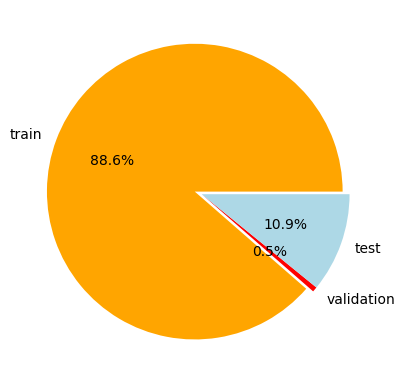

In [5]:
#Visualize size of folders
plt.pie([len(train_data), len(val_data), len(test_data)],
        labels=['train', 'validation', 'test'], autopct='%.1f%%', colors=['orange', 'red', 'lightblue'], explode=(0.05, 0, 0))
plt.show()

In [6]:
print(train_data.class_names)
print(val_data.class_names)
print(test_data.class_names)

['NORMAL', 'PNEUMONIA']
['NORMAL', 'PNEUMONIA']
['NORMAL', 'PNEUMONIA']


In [30]:
classs = train_data.class_names
len(classs)

2

C:\Program Files\Python310\lib\site-packages\matplotlib\text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


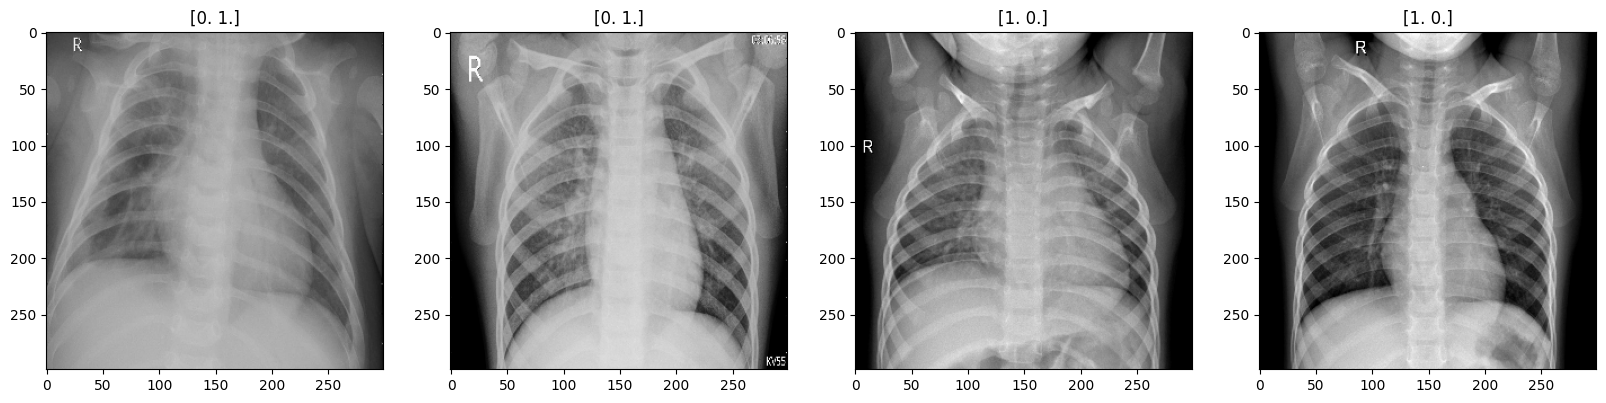

In [7]:
#View images
data_iterator = train_data.as_numpy_iterator()
batch = data_iterator.next()
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [8]:
# Extracting Features and Labels
x_train = []
y_train = []
x_val = []
y_val = []
x_test = []
y_test = []

for feature, label in train_data:
    x_train.append(feature.numpy())
    y_train.append(label.numpy())

for feature, label in test_data:
    x_test.append(feature.numpy())
    y_test.append(label.numpy())
    
for feature, label in val_data:
    x_val.append(feature.numpy())
    y_val.append(label.numpy())

# Concatenate the lists to get the full 'x' and 'y' arrays
x_train = np.concatenate(x_train, axis=0)
x_val = np.concatenate(x_val, axis=0)
x_test = np.concatenate(x_test, axis=0)
y_train = np.concatenate(y_train, axis=0)
y_val = np.concatenate(y_val, axis=0)
y_test = np.concatenate(y_test, axis=0)

In [9]:
# check the shapes of 'x_train' and 'y_train':
print("Shape of 'x_train':", x_train.shape)
print("Shape of 'y_train':", y_train.shape)
print("Shape of 'x_val':", x_val.shape)
print("Shape of 'y_val':", y_val.shape)
print("Shape of 'x_test':", x_test.shape)
print("Shape of 'y_test':", y_test.shape)

Shape of 'x_train': (5216, 299, 299, 3)
Shape of 'y_train': (5216, 2)
Shape of 'x_val': (16, 299, 299, 3)
Shape of 'y_val': (16, 2)
Shape of 'x_test': (624, 299, 299, 3)
Shape of 'y_test': (624, 2)


In [10]:
x_train=x_train/255
x_val=x_val/255
x_test=x_test/255


In [11]:
y_train.shape

(5216, 2)


### Inception v4 Model 

In [12]:
from tensorflow.keras.layers import Concatenate
import tensorflow as tf
from tensorflow.keras.layers import Input, Dropout, Dense, Flatten, Activation, MaxPooling2D, Conv2D, AveragePooling2D, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K

 

from tensorflow.keras import regularizers
from tensorflow.keras import initializers

 

 

#########################################################################################
# Implements the Inception Network v4 (http://arxiv.org/pdf/1602.07261v1.pdf) in Keras. #
#########################################################################################

 

WEIGHTS_PATH = 'https://github.com/kentsommer/keras-inceptionV4/releases/download/2.1/inception-v4_weights_tf_dim_ordering_tf_kernels.h5'
WEIGHTS_PATH_NO_TOP = 'https://github.com/kentsommer/keras-inceptionV4/releases/download/2.1/inception-v4_weights_tf_dim_ordering_tf_kernels_notop.h5'

 

 

def preprocess_input(x):
    x = np.divide(x, 255.0)
    x = np.subtract(x, 0.5)
    x = np.multiply(x, 2.0)
    return x

 

 

def conv2d_bn(x, nb_filter, num_row, num_col,
              padding='same', strides=(1, 1), use_bias=False):
    """
    Utility function to apply conv + BN. 
    (Slightly modified from https://github.com/fchollet/keras/blob/master/keras/applications/inception_v3.py)
    """
    if K.image_data_format() == 'channels_first':
        channel_axis = 1
    else:
        channel_axis = -1
    x = Conv2D(nb_filter, (num_row, num_col),
                      strides=strides,
                      padding=padding,
                      use_bias=use_bias,
                      kernel_regularizer=regularizers.l2(0.00004),
                      kernel_initializer=initializers.VarianceScaling(scale=2.0, mode='fan_in', distribution='normal', seed=None))(x)
    x = BatchNormalization(axis=channel_axis, momentum=0.9997, scale=False)(x)
    x = Activation('relu')(x)
    return x

 

 

def block_inception_a(input):
    if K.image_data_format() == 'channels_first':
        channel_axis = 1
    else:
        channel_axis = -1

 

    branch_0 = conv2d_bn(input, 96, 1, 1)

 

    branch_1 = conv2d_bn(input, 64, 1, 1)
    branch_1 = conv2d_bn(branch_1, 96, 3, 3)

 

    branch_2 = conv2d_bn(input, 64, 1, 1)
    branch_2 = conv2d_bn(branch_2, 96, 3, 3)
    branch_2 = conv2d_bn(branch_2, 96, 3, 3)

 

    branch_3 = AveragePooling2D((3,3), strides=(1,1), padding='same')(input)
    branch_3 = conv2d_bn(branch_3, 96, 1, 1)

 

#    x = Concatenate([branch_0, branch_1, branch_2, branch_3], axis=channel_axis)
    x = Concatenate(axis=channel_axis)([branch_0, branch_1, branch_2, branch_3])
    return x

 

 

def block_reduction_a(input):
    if K.image_data_format() == 'channels_first':
        channel_axis = 1
    else:
        channel_axis = -1

 

    branch_0 = conv2d_bn(input, 384, 3, 3, strides=(2,2), padding='valid')

 

    branch_1 = conv2d_bn(input, 192, 1, 1)
    branch_1 = conv2d_bn(branch_1, 224, 3, 3)
    branch_1 = conv2d_bn(branch_1, 256, 3, 3, strides=(2,2), padding='valid')

 

    branch_2 = MaxPooling2D((3,3), strides=(2,2), padding='valid')(input)

 

    x = Concatenate(axis=channel_axis)([branch_0, branch_1, branch_2])
    return x

 

 

def block_inception_b(input):
    if K.image_data_format() == 'channels_first':
        channel_axis = 1
    else:
        channel_axis = -1

 

    branch_0 = conv2d_bn(input, 384, 1, 1)

 

    branch_1 = conv2d_bn(input, 192, 1, 1)
    branch_1 = conv2d_bn(branch_1, 224, 1, 7)
    branch_1 = conv2d_bn(branch_1, 256, 7, 1)

 

    branch_2 = conv2d_bn(input, 192, 1, 1)
    branch_2 = conv2d_bn(branch_2, 192, 7, 1)
    branch_2 = conv2d_bn(branch_2, 224, 1, 7)
    branch_2 = conv2d_bn(branch_2, 224, 7, 1)
    branch_2 = conv2d_bn(branch_2, 256, 1, 7)

 

    branch_3 = AveragePooling2D((3,3), strides=(1,1), padding='same')(input)
    branch_3 = conv2d_bn(branch_3, 128, 1, 1)

 

    
    x = Concatenate(axis=channel_axis)([branch_0, branch_1, branch_2, branch_3])
    return x

 

 

def block_reduction_b(input):
    if K.image_data_format() == 'channels_first':
        channel_axis = 1
    else:
        channel_axis = -1

 

    branch_0 = conv2d_bn(input, 192, 1, 1)
    branch_0 = conv2d_bn(branch_0, 192, 3, 3, strides=(2, 2), padding='valid')

 

    branch_1 = conv2d_bn(input, 256, 1, 1)
    branch_1 = conv2d_bn(branch_1, 256, 1, 7)
    branch_1 = conv2d_bn(branch_1, 320, 7, 1)
    branch_1 = conv2d_bn(branch_1, 320, 3, 3, strides=(2,2), padding='valid')

 

    branch_2 = MaxPooling2D((3, 3), strides=(2, 2), padding='valid')(input)
    x = Concatenate(axis=channel_axis)([branch_0, branch_1, branch_2])

 

    
    return x

 

 

def block_inception_c(input):
    if K.image_data_format() == 'channels_first':
        channel_axis = 1
    else:
        channel_axis = -1

 

    branch_0 = conv2d_bn(input, 256, 1, 1)

 

    branch_1 = conv2d_bn(input, 384, 1, 1)
    branch_10 = conv2d_bn(branch_1, 256, 1, 3)
    branch_11 = conv2d_bn(branch_1, 256, 3, 1)

 

    branch_1 = Concatenate(axis=channel_axis)([branch_10, branch_11])

 

 

    branch_2 = conv2d_bn(input, 384, 1, 1)
    branch_2 = conv2d_bn(branch_2, 448, 3, 1)
    branch_2 = conv2d_bn(branch_2, 512, 1, 3)
    branch_20 = conv2d_bn(branch_2, 256, 1, 3)
    branch_21 = conv2d_bn(branch_2, 256, 3, 1)
    branch_2 = Concatenate(axis=channel_axis)([branch_20, branch_21])

 

    branch_3 = AveragePooling2D((3, 3), strides=(1, 1), padding='same')(input)
    branch_3 = conv2d_bn(branch_3, 256, 1, 1)
    x = Concatenate(axis=channel_axis)([branch_0, branch_1, branch_2, branch_3])

 

    
    return x

 

 

def inception_v4_base(input):
    if K.image_data_format() == 'channels_first':
        channel_axis = 1
    else:
        channel_axis = -1

 

    # Input Shape is 299 x 299 x 3 (th) or 3 x 299 x 299 (th)
    net = conv2d_bn(input, 32, 3, 3, strides=(2,2), padding='valid')
    net = conv2d_bn(net, 32, 3, 3, padding='valid')
    net = conv2d_bn(net, 64, 3, 3)

 

    branch_0 = MaxPooling2D((3,3), strides=(2,2), padding='valid')(net)

 

    branch_1 = conv2d_bn(net, 96, 3, 3, strides=(2,2), padding='valid')

 

    net = Concatenate(axis=channel_axis)([branch_0, branch_1])
    branch_0 = conv2d_bn(net, 64, 1, 1)
    branch_0 = conv2d_bn(branch_0, 96, 3, 3, padding='valid')

 

    branch_1 = conv2d_bn(net, 64, 1, 1)
    branch_1 = conv2d_bn(branch_1, 64, 1, 7)
    branch_1 = conv2d_bn(branch_1, 64, 7, 1)
    branch_1 = conv2d_bn(branch_1, 96, 3, 3, padding='valid')
    net = Concatenate(axis=channel_axis)([branch_0, branch_1])

 

 

    branch_0 = conv2d_bn(net, 192, 3, 3, strides=(2,2), padding='valid')
    branch_1 = MaxPooling2D((3,3), strides=(2,2), padding='valid')(net)

 

    net = Concatenate(axis=channel_axis)([branch_0, branch_1])

 

    # 35 x 35 x 384
    # 4 x Inception-A blocks
    for idx in range(4):
        net = block_inception_a(net)

 

    # 35 x 35 x 384
    # Reduction-A block
    net = block_reduction_a(net)

 

    # 17 x 17 x 1024
    # 7 x Inception-B blocks
    for idx in range(7):
        net = block_inception_b(net)

 

    # 17 x 17 x 1024
    # Reduction-B block
    net = block_reduction_b(net)

 

    # 8 x 8 x 1536
    # 3 x Inception-C blocks
    for idx in range(3):
        net = block_inception_c(net)

 

    return net

 

 

def inception_v4(num_classes, dropout_keep_prob, weights, include_top):
    '''
    Creates the inception v4 network

 

    Args:
        num_classes: number of classes
        dropout_keep_prob: float, the fraction to keep before final layer.

    Returns: 
        logits: the logits outputs of the model.
    '''

 

    # Input Shape is 299 x 299 x 3 (tf) or 3 x 299 x 299 (th)
    if K.image_data_format() == 'channels_first':
        inputs = Input((3, 299, 299))
    else:
        inputs = Input((299, 299, 3))

 

    # Make inception base
    x = inception_v4_base(inputs)

 

 

    # Final pooling and prediction
    if include_top:
        # 1 x 1 x 1536
        x = AveragePooling2D((8,8), padding='valid')(x)
        x = Dropout(dropout_keep_prob)(x)
        x = Flatten()(x)
        # 1536
        x = Dense(units=num_classes, activation='sigmoid')(x)

 

    model = Model(inputs, x, name='inception_v4')

 

    # load weights
    if weights == 'imagenet':
        if K.image_data_format() == 'channels_first':
            if K.backend() == 'tensorflow':
                warnings.warn('You are using the TensorFlow backend, yet you '
                              'are using the Theano '
                              'image data format convention '
                              '(`image_data_format="channels_first"`). '
                              'For best performance, set '
                              '`image_data_format="channels_last"` in '
                              'your Keras config '
                              'at ~/.keras/keras.json.')
        if include_top:
            weights_path = tf.keras.utils.get_file(
                'inception-v4_weights_tf_dim_ordering_tf_kernels.h5',
                WEIGHTS_PATH,
                cache_subdir='models',
                md5_hash='9fe79d77f793fe874470d84ca6ba4a3b')
        else:
            weights_path = tf.keras.utils.get_file(
                'inception-v4_weights_tf_dim_ordering_tf_kernels_notop.h5',
                WEIGHTS_PATH_NO_TOP,
                cache_subdir='models',
                md5_hash='9296b46b5971573064d12e4669110969')
        model.load_weights(weights_path, by_name=True)
    return model

 

 

def create_model(num_classes=2, dropout_prob=0.2, weights=None, include_top=True):
    return inception_v4(num_classes, dropout_prob, weights, include_top)

### Inception V4 - RMSprop

In [13]:
model_t = create_model()
model_t.compile(optimizer='RMSProp', loss='binary_crossentropy', metrics=['accuracy'])
model_t.summary()

Model: "inception_v4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                      

 activation_5 (Activation)      (None, 71, 71, 96)   0           ['batch_normalization_5[0][0]']  
                                                                                                  
 activation_9 (Activation)      (None, 71, 71, 96)   0           ['batch_normalization_9[0][0]']  
                                                                                                  
 concatenate_1 (Concatenate)    (None, 71, 71, 192)  0           ['activation_5[0][0]',           
                                                                  'activation_9[0][0]']           
                                                                                                  
 conv2d_10 (Conv2D)             (None, 35, 35, 192)  331776      ['concatenate_1[0][0]']          
                                                                                                  
 batch_normalization_10 (BatchN  (None, 35, 35, 192)  576        ['conv2d_10[0][0]']              
 ormalizat

 conv2d_19 (Conv2D)             (None, 35, 35, 64)   24576       ['concatenate_3[0][0]']          
                                                                                                  
 conv2d_22 (Conv2D)             (None, 35, 35, 96)   55296       ['activation_21[0][0]']          
                                                                                                  
 batch_normalization_19 (BatchN  (None, 35, 35, 64)  192         ['conv2d_19[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_22 (BatchN  (None, 35, 35, 96)  288         ['conv2d_22[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activatio

 ormalization)                                                                                    
                                                                                                  
 batch_normalization_27 (BatchN  (None, 35, 35, 96)  288         ['conv2d_27[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_30 (BatchN  (None, 35, 35, 96)  288         ['conv2d_30[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_31 (BatchN  (None, 35, 35, 96)  288         ['conv2d_31[0][0]']              
 ormalization)                                                                                    
          

 batch_normalization_40 (BatchN  (None, 35, 35, 192)  576        ['conv2d_40[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_40 (Activation)     (None, 35, 35, 192)  0           ['batch_normalization_40[0][0]'] 
                                                                                                  
 conv2d_41 (Conv2D)             (None, 35, 35, 224)  387072      ['activation_40[0][0]']          
                                                                                                  
 batch_normalization_41 (BatchN  (None, 35, 35, 224)  672        ['conv2d_41[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activatio

 conv2d_52 (Conv2D)             (None, 17, 17, 128)  131072      ['average_pooling2d_4[0][0]']    
                                                                                                  
 batch_normalization_43 (BatchN  (None, 17, 17, 384)  1152       ['conv2d_43[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_46 (BatchN  (None, 17, 17, 256)  768        ['conv2d_46[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_51 (BatchN  (None, 17, 17, 256)  768        ['conv2d_51[0][0]']              
 ormalization)                                                                                    
          

 batch_normalization_56 (BatchN  (None, 17, 17, 256)  768        ['conv2d_56[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_61 (BatchN  (None, 17, 17, 256)  768        ['conv2d_61[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_62 (BatchN  (None, 17, 17, 128)  384        ['conv2d_62[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_53 (Activation)     (None, 17, 17, 384)  0           ['batch_normalization_53[0][0]'] 
          

                                                                                                  
 batch_normalization_72 (BatchN  (None, 17, 17, 128)  384        ['conv2d_72[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_63 (Activation)     (None, 17, 17, 384)  0           ['batch_normalization_63[0][0]'] 
                                                                                                  
 activation_66 (Activation)     (None, 17, 17, 256)  0           ['batch_normalization_66[0][0]'] 
                                                                                                  
 activation_71 (Activation)     (None, 17, 17, 256)  0           ['batch_normalization_71[0][0]'] 
                                                                                                  
 activatio

                                                                                                  
 activation_76 (Activation)     (None, 17, 17, 256)  0           ['batch_normalization_76[0][0]'] 
                                                                                                  
 activation_81 (Activation)     (None, 17, 17, 256)  0           ['batch_normalization_81[0][0]'] 
                                                                                                  
 activation_82 (Activation)     (None, 17, 17, 128)  0           ['batch_normalization_82[0][0]'] 
                                                                                                  
 concatenate_11 (Concatenate)   (None, 17, 17, 1024  0           ['activation_73[0][0]',          
                                )                                 'activation_76[0][0]',          
                                                                  'activation_81[0][0]',          
          

 activation_92 (Activation)     (None, 17, 17, 128)  0           ['batch_normalization_92[0][0]'] 
                                                                                                  
 concatenate_12 (Concatenate)   (None, 17, 17, 1024  0           ['activation_83[0][0]',          
                                )                                 'activation_86[0][0]',          
                                                                  'activation_91[0][0]',          
                                                                  'activation_92[0][0]']          
                                                                                                  
 conv2d_97 (Conv2D)             (None, 17, 17, 192)  196608      ['concatenate_12[0][0]']         
                                                                                                  
 batch_normalization_97 (BatchN  (None, 17, 17, 192)  576        ['conv2d_97[0][0]']              
 ormalizat

                                                                  'activation_102[0][0]']         
                                                                                                  
 conv2d_107 (Conv2D)            (None, 17, 17, 192)  196608      ['concatenate_13[0][0]']         
                                                                                                  
 batch_normalization_107 (Batch  (None, 17, 17, 192)  576        ['conv2d_107[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_107 (Activation)    (None, 17, 17, 192)  0           ['batch_normalization_107[0][0]']
                                                                                                  
 conv2d_108 (Conv2D)            (None, 17, 17, 192)  258048      ['activation_107[0][0]']         
          

 Normalization)                                                                                   
                                                                                                  
 activation_115 (Activation)    (None, 17, 17, 256)  0           ['batch_normalization_115[0][0]']
                                                                                                  
 conv2d_116 (Conv2D)            (None, 17, 17, 256)  458752      ['activation_115[0][0]']         
                                                                                                  
 batch_normalization_116 (Batch  (None, 17, 17, 256)  768        ['conv2d_116[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_116 (Activation)    (None, 17, 17, 256)  0           ['batch_normalization_116[0][0]']
          

                                                                                                  
 conv2d_119 (Conv2D)            (None, 8, 8, 256)    393216      ['concatenate_15[0][0]']         
                                                                                                  
 batch_normalization_121 (Batch  (None, 8, 8, 256)   768         ['conv2d_121[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_122 (Batch  (None, 8, 8, 256)   768         ['conv2d_122[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_126 (Batch  (None, 8, 8, 256)   768         ['conv2d_126[0][0]']             
 Normaliza

 ooling2D)                                                                                        
                                                                                                  
 conv2d_129 (Conv2D)            (None, 8, 8, 256)    393216      ['concatenate_18[0][0]']         
                                                                                                  
 batch_normalization_131 (Batch  (None, 8, 8, 256)   768         ['conv2d_131[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_132 (Batch  (None, 8, 8, 256)   768         ['conv2d_132[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_nor

 average_pooling2d_13 (AverageP  (None, 8, 8, 1536)  0           ['concatenate_21[0][0]']         
 ooling2D)                                                                                        
                                                                                                  
 conv2d_139 (Conv2D)            (None, 8, 8, 256)    393216      ['concatenate_21[0][0]']         
                                                                                                  
 batch_normalization_141 (Batch  (None, 8, 8, 256)   768         ['conv2d_141[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_142 (Batch  (None, 8, 8, 256)   768         ['conv2d_142[0][0]']             
 Normalization)                                                                                   
          

In [14]:
hist = model_t.fit(x_train, y_train, epochs= 10, validation_data= (x_val, y_val), batch_size=32)
print(hist.history)
best_score = max(hist.history['val_accuracy'])
print(f"Best Validation score is: {best_score}")

Epoch 1/10
163/163 [==============================] - 66s 292ms/step - loss: 2.4079 - accuracy: 0.8386 - val_loss: 789688524734464.0000 - val_accuracy: 0.5000
Epoch 2/10
163/163 [==============================] - 46s 280ms/step - loss: 1.0615 - accuracy: 0.8631 - val_loss: 223942934528.0000 - val_accuracy: 0.5000
Epoch 3/10
163/163 [==============================] - 46s 281ms/step - loss: 0.5614 - accuracy: 0.9133 - val_loss: 30419406848.0000 - val_accuracy: 0.5000
Epoch 4/10
163/163 [==============================] - 47s 288ms/step - loss: 0.3762 - accuracy: 0.9348 - val_loss: 69771.7266 - val_accuracy: 0.5000
Epoch 5/10
163/163 [==============================] - 46s 281ms/step - loss: 0.3345 - accuracy: 0.9363 - val_loss: 11008058.0000 - val_accuracy: 0.5000
Epoch 6/10
163/163 [==============================] - 46s 280ms/step - loss: 0.3043 - accuracy: 0.9406 - val_loss: 938774.3125 - val_accuracy: 0.5000
Epoch 7/10
163/163 [==============================] - 46s 280ms/step - loss: 0.

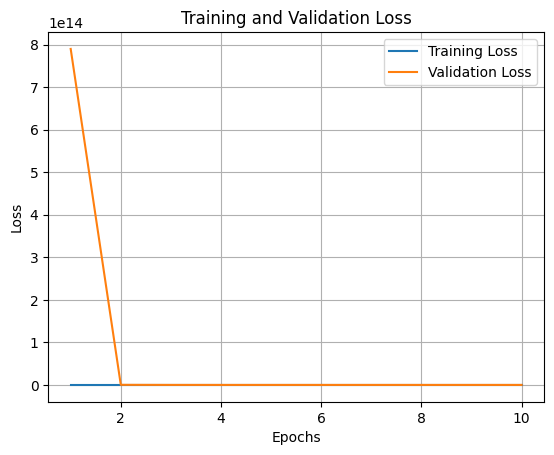

In [15]:
# Extract the training and validation loss values from the history object
train_loss = hist.history['loss']
val_loss = hist.history['val_loss']

# Create a list of epoch numbers (1 to number of epochs)
epochs = range(1, len(train_loss) + 1)

# Plot the loss graph
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

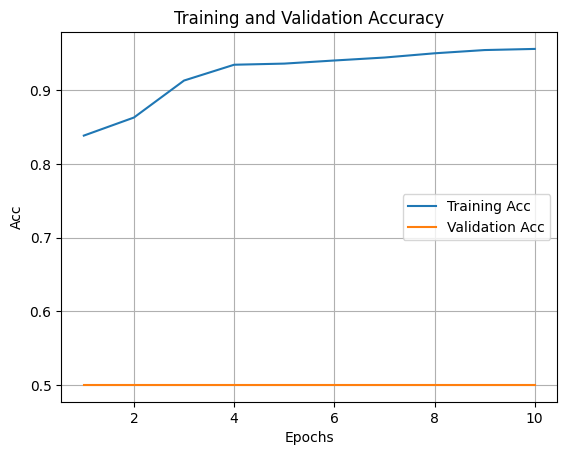

In [16]:
# Extract the training and validation loss values from the history object
train_accuracy = hist.history['accuracy']
val_accuracy = hist.history['val_accuracy']

# Create a list of epoch numbers (1 to number of epochs)
epochs = range(1, len(train_accuracy) + 1)

# Plot the loss graph
plt.plot(epochs, train_accuracy , label='Training Acc')
plt.plot(epochs, val_accuracy, label='Validation Acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.grid(True)
plt.show()


In [17]:
#evaluate model
model_t.evaluate(x_test,y_test)

20/20 [==============================] - 2s 76ms/step - loss: 58738.5820 - accuracy: 0.3750


[58738.58203125, 0.375]

In [18]:
y_pred = model_t.predict(x_test)

20/20 [==============================] - 2s 62ms/step


In [19]:
#Get pred Class
pred_class = np.argmax(y_pred,axis=1)
pred_class

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [20]:
y_test_c = np.argmax(y_test,axis=1)

In [23]:
#classification report
from sklearn.metrics import classification_report, confusion_matrix
print("Classification Report Inception V4 Using RMSProp")
print(classification_report(y_test_c,pred_class))

Classification Report Inception V4 Using RMSProp
              precision    recall  f1-score   support

           0       0.38      1.00      0.55       234
           1       0.00      0.00      0.00       390

    accuracy                           0.38       624
   macro avg       0.19      0.50      0.27       624
weighted avg       0.14      0.38      0.20       624



C:\Program Files\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Program Files\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Program Files\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


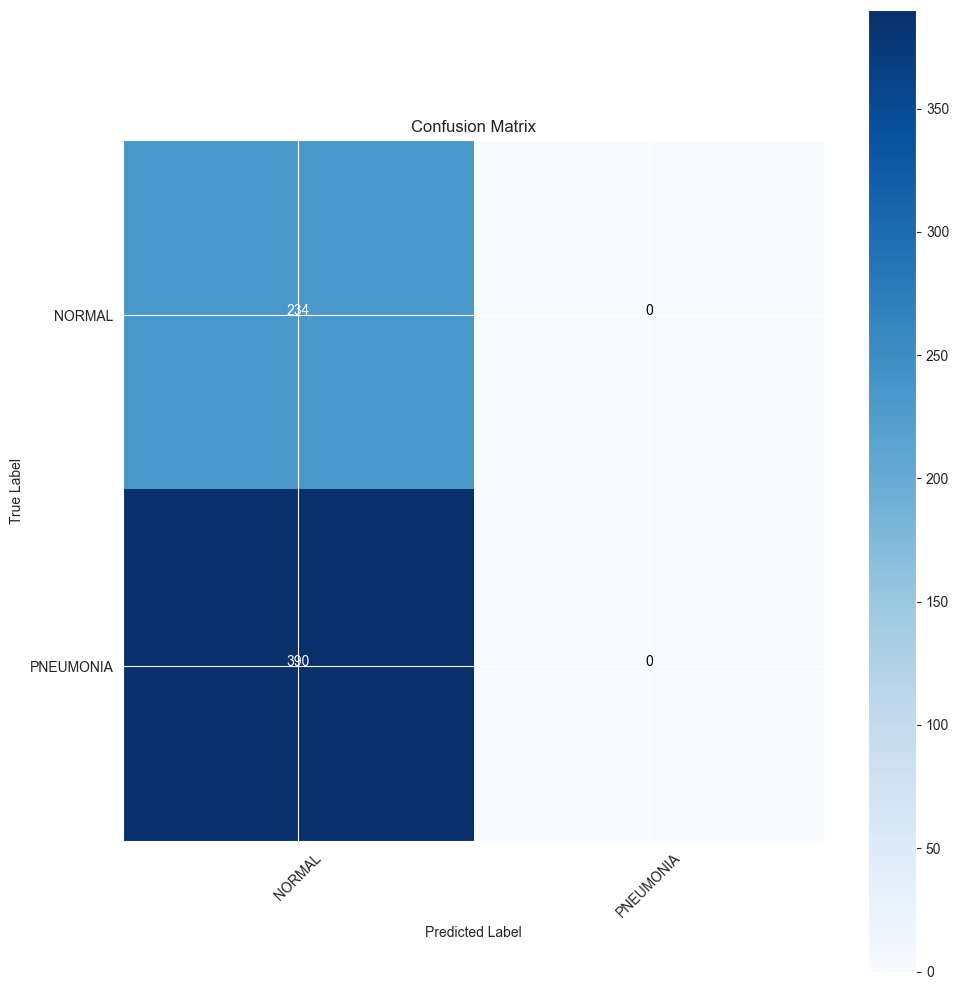

In [33]:
# Confusion matrix
cm = confusion_matrix(y_test_c, pred_class)

plt.figure(figsize= (10, 10))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classs))
plt.xticks(tick_marks, classs, rotation= 45)
plt.yticks(tick_marks, classs)
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()

### Inception V4- SGD Optimizer

In [34]:
from tensorflow.keras.optimizers import SGD

In [35]:
model_t = create_model()
model_t.compile(optimizer=SGD(learning_rate=0.001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])
model_t.summary()

Model: "inception_v4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_149 (Conv2D)            (None, 149, 149, 32  864         ['input_2[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_149 (Batch  (None, 149, 149, 32  96         ['conv2d_149[0][0]']             
 Normalization)                 )                                                      

 activation_154 (Activation)    (None, 71, 71, 96)   0           ['batch_normalization_154[0][0]']
                                                                                                  
 activation_158 (Activation)    (None, 71, 71, 96)   0           ['batch_normalization_158[0][0]']
                                                                                                  
 concatenate_26 (Concatenate)   (None, 71, 71, 192)  0           ['activation_154[0][0]',         
                                                                  'activation_158[0][0]']         
                                                                                                  
 conv2d_159 (Conv2D)            (None, 35, 35, 192)  331776      ['concatenate_26[0][0]']         
                                                                                                  
 batch_normalization_159 (Batch  (None, 35, 35, 192)  576        ['conv2d_159[0][0]']             
 Normaliza

 conv2d_168 (Conv2D)            (None, 35, 35, 64)   24576       ['concatenate_28[0][0]']         
                                                                                                  
 conv2d_171 (Conv2D)            (None, 35, 35, 96)   55296       ['activation_170[0][0]']         
                                                                                                  
 batch_normalization_168 (Batch  (None, 35, 35, 64)  192         ['conv2d_168[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_171 (Batch  (None, 35, 35, 96)  288         ['conv2d_171[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activatio

 Normalization)                                                                                   
                                                                                                  
 batch_normalization_176 (Batch  (None, 35, 35, 96)  288         ['conv2d_176[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_179 (Batch  (None, 35, 35, 96)  288         ['conv2d_179[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_180 (Batch  (None, 35, 35, 96)  288         ['conv2d_180[0][0]']             
 Normalization)                                                                                   
          

 batch_normalization_189 (Batch  (None, 35, 35, 192)  576        ['conv2d_189[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_189 (Activation)    (None, 35, 35, 192)  0           ['batch_normalization_189[0][0]']
                                                                                                  
 conv2d_190 (Conv2D)            (None, 35, 35, 224)  387072      ['activation_189[0][0]']         
                                                                                                  
 batch_normalization_190 (Batch  (None, 35, 35, 224)  672        ['conv2d_190[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activatio

 conv2d_201 (Conv2D)            (None, 17, 17, 128)  131072      ['average_pooling2d_19[0][0]']   
                                                                                                  
 batch_normalization_192 (Batch  (None, 17, 17, 384)  1152       ['conv2d_192[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_195 (Batch  (None, 17, 17, 256)  768        ['conv2d_195[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_200 (Batch  (None, 17, 17, 256)  768        ['conv2d_200[0][0]']             
 Normalization)                                                                                   
          

 batch_normalization_205 (Batch  (None, 17, 17, 256)  768        ['conv2d_205[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_210 (Batch  (None, 17, 17, 256)  768        ['conv2d_210[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_211 (Batch  (None, 17, 17, 128)  384        ['conv2d_211[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_202 (Activation)    (None, 17, 17, 384)  0           ['batch_normalization_202[0][0]']
          

                                                                                                  
 batch_normalization_221 (Batch  (None, 17, 17, 128)  384        ['conv2d_221[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_212 (Activation)    (None, 17, 17, 384)  0           ['batch_normalization_212[0][0]']
                                                                                                  
 activation_215 (Activation)    (None, 17, 17, 256)  0           ['batch_normalization_215[0][0]']
                                                                                                  
 activation_220 (Activation)    (None, 17, 17, 256)  0           ['batch_normalization_220[0][0]']
                                                                                                  
 activatio

                                                                                                  
 activation_225 (Activation)    (None, 17, 17, 256)  0           ['batch_normalization_225[0][0]']
                                                                                                  
 activation_230 (Activation)    (None, 17, 17, 256)  0           ['batch_normalization_230[0][0]']
                                                                                                  
 activation_231 (Activation)    (None, 17, 17, 128)  0           ['batch_normalization_231[0][0]']
                                                                                                  
 concatenate_36 (Concatenate)   (None, 17, 17, 1024  0           ['activation_222[0][0]',         
                                )                                 'activation_225[0][0]',         
                                                                  'activation_230[0][0]',         
          

 activation_241 (Activation)    (None, 17, 17, 128)  0           ['batch_normalization_241[0][0]']
                                                                                                  
 concatenate_37 (Concatenate)   (None, 17, 17, 1024  0           ['activation_232[0][0]',         
                                )                                 'activation_235[0][0]',         
                                                                  'activation_240[0][0]',         
                                                                  'activation_241[0][0]']         
                                                                                                  
 conv2d_246 (Conv2D)            (None, 17, 17, 192)  196608      ['concatenate_37[0][0]']         
                                                                                                  
 batch_normalization_246 (Batch  (None, 17, 17, 192)  576        ['conv2d_246[0][0]']             
 Normaliza

                                                                  'activation_251[0][0]']         
                                                                                                  
 conv2d_256 (Conv2D)            (None, 17, 17, 192)  196608      ['concatenate_38[0][0]']         
                                                                                                  
 batch_normalization_256 (Batch  (None, 17, 17, 192)  576        ['conv2d_256[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_256 (Activation)    (None, 17, 17, 192)  0           ['batch_normalization_256[0][0]']
                                                                                                  
 conv2d_257 (Conv2D)            (None, 17, 17, 192)  258048      ['activation_256[0][0]']         
          

 Normalization)                                                                                   
                                                                                                  
 activation_264 (Activation)    (None, 17, 17, 256)  0           ['batch_normalization_264[0][0]']
                                                                                                  
 conv2d_265 (Conv2D)            (None, 17, 17, 256)  458752      ['activation_264[0][0]']         
                                                                                                  
 batch_normalization_265 (Batch  (None, 17, 17, 256)  768        ['conv2d_265[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_265 (Activation)    (None, 17, 17, 256)  0           ['batch_normalization_265[0][0]']
          

                                                                                                  
 conv2d_268 (Conv2D)            (None, 8, 8, 256)    393216      ['concatenate_40[0][0]']         
                                                                                                  
 batch_normalization_270 (Batch  (None, 8, 8, 256)   768         ['conv2d_270[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_271 (Batch  (None, 8, 8, 256)   768         ['conv2d_271[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_275 (Batch  (None, 8, 8, 256)   768         ['conv2d_275[0][0]']             
 Normaliza

 ooling2D)                                                                                        
                                                                                                  
 conv2d_278 (Conv2D)            (None, 8, 8, 256)    393216      ['concatenate_43[0][0]']         
                                                                                                  
 batch_normalization_280 (Batch  (None, 8, 8, 256)   768         ['conv2d_280[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_281 (Batch  (None, 8, 8, 256)   768         ['conv2d_281[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_nor

 average_pooling2d_28 (AverageP  (None, 8, 8, 1536)  0           ['concatenate_46[0][0]']         
 ooling2D)                                                                                        
                                                                                                  
 conv2d_288 (Conv2D)            (None, 8, 8, 256)    393216      ['concatenate_46[0][0]']         
                                                                                                  
 batch_normalization_290 (Batch  (None, 8, 8, 256)   768         ['conv2d_290[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_291 (Batch  (None, 8, 8, 256)   768         ['conv2d_291[0][0]']             
 Normalization)                                                                                   
          

In [36]:
hist = model_t.fit(x_train, y_train, epochs= 10, validation_data= (x_val, y_val), batch_size=32)
print(hist.history)
best_score = max(hist.history['val_accuracy'])
print(f"Best Validation score is: {best_score}")

Epoch 1/10
163/163 [==============================] - 46s 246ms/step - loss: 3.0459 - accuracy: 0.7678 - val_loss: 22444.4707 - val_accuracy: 0.5000
Epoch 2/10
163/163 [==============================] - 39s 240ms/step - loss: 2.7847 - accuracy: 0.9068 - val_loss: 175262.2031 - val_accuracy: 0.5000
Epoch 3/10
163/163 [==============================] - 39s 240ms/step - loss: 2.7182 - accuracy: 0.9323 - val_loss: 210892.1406 - val_accuracy: 0.5000
Epoch 4/10
163/163 [==============================] - 39s 241ms/step - loss: 2.6789 - accuracy: 0.9452 - val_loss: 63367.3398 - val_accuracy: 0.5000
Epoch 5/10
163/163 [==============================] - 39s 241ms/step - loss: 2.6623 - accuracy: 0.9519 - val_loss: 12865.9648 - val_accuracy: 0.5000
Epoch 6/10
163/163 [==============================] - 119s 736ms/step - loss: 2.6540 - accuracy: 0.9561 - val_loss: 17013.8770 - val_accuracy: 0.5000
Epoch 7/10
163/163 [==============================] - 41s 249ms/step - loss: 2.6560 - accuracy: 0.9582 

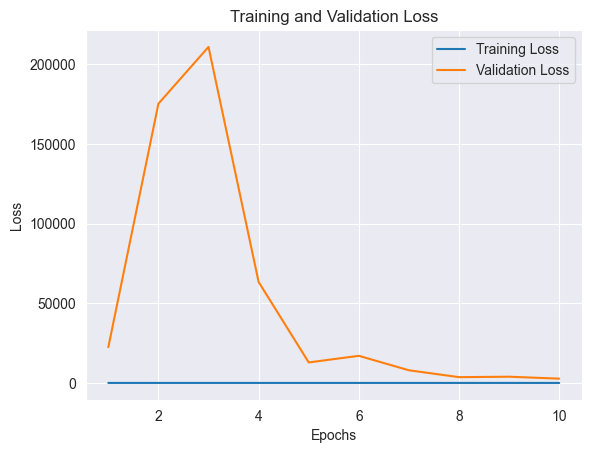

In [37]:
# Extract the training and validation loss values from the history object
train_loss = hist.history['loss']
val_loss = hist.history['val_loss']

# Create a list of epoch numbers (1 to number of epochs)
epochs = range(1, len(train_loss) + 1)

# Plot the loss graph
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

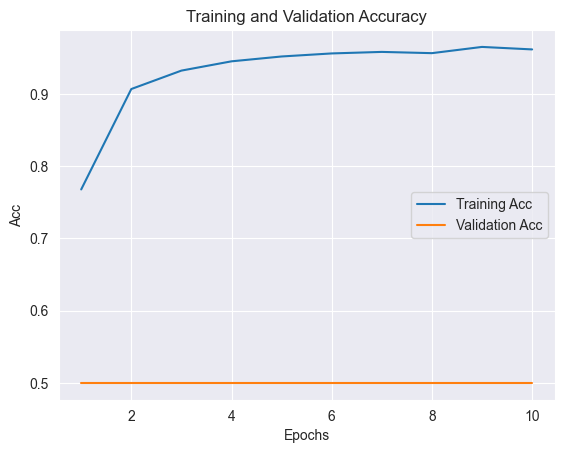

In [38]:
# Extract the training and validation loss values from the history object
train_accuracy = hist.history['accuracy']
val_accuracy = hist.history['val_accuracy']

# Create a list of epoch numbers (1 to number of epochs)
epochs = range(1, len(train_accuracy) + 1)

# Plot the loss graph
plt.plot(epochs, train_accuracy , label='Training Acc')
plt.plot(epochs, val_accuracy, label='Validation Acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.grid(True)
plt.show()


In [39]:
#evaluate model
model_t.evaluate(x_test,y_test)

20/20 [==============================] - 2s 76ms/step - loss: 1912.4545 - accuracy: 0.6250


[1912.4544677734375, 0.625]

In [40]:
y_pred = model_t.predict(x_test)

20/20 [==============================] - 3s 76ms/step


In [41]:
#Get pred Class
pred_class = np.argmax(y_pred,axis=1)
pred_class

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [42]:
y_test_c = np.argmax(y_test,axis=1)

In [43]:
#classification report Using SGD
from sklearn.metrics import classification_report
print("Classification Report Inception V4 Using RMSProp")
print(classification_report(y_test_c,pred_class))

Classification Report Inception V4 Using RMSProp
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       234
           1       0.62      1.00      0.77       390

    accuracy                           0.62       624
   macro avg       0.31      0.50      0.38       624
weighted avg       0.39      0.62      0.48       624



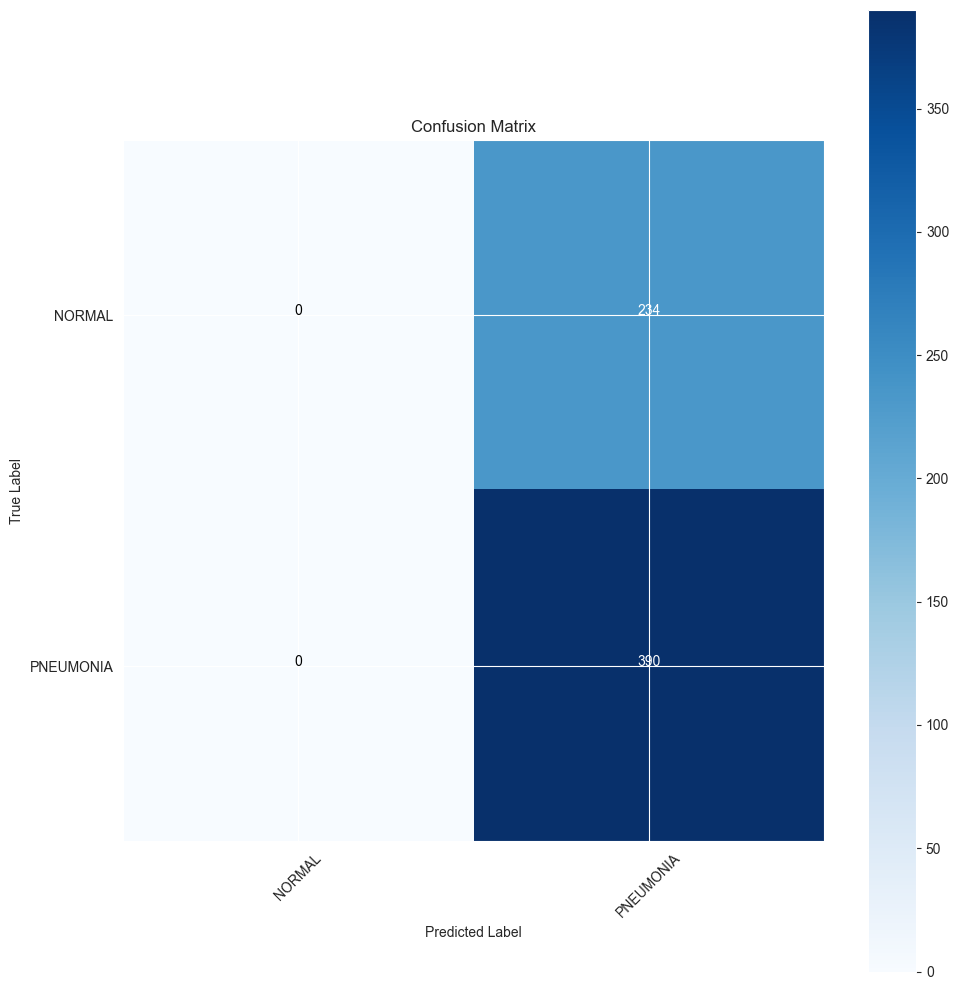

In [44]:
# Confusion matrix
cm = confusion_matrix(y_test_c, pred_class)

plt.figure(figsize= (10, 10))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classs))
plt.xticks(tick_marks, classs, rotation= 45)
plt.yticks(tick_marks, classs)
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()

### Use Data Augumentation

In [5]:
!pip install opencv

ERROR: Could not find a version that satisfies the requirement opencv (from versions: none)
ERROR: No matching distribution found for opencv


In [3]:
#!pip install scikit_learn

Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for scikit_learn from https://files.pythonhosted.org/packages/96/cf/a714a655266229b51eb2bda117f15275f12457887f165f3c1cc58ab502f1/scikit_learn-1.3.0-cp310-cp310-win_amd64.whl.metadata
  Obtaining dependency information for scipy>=1.5.0 from https://files.pythonhosted.org/packages/70/03/485f73046134400ea25d3cb178c5e6728f9b165f79d09638ecb44ee0e9b1/scipy-1.11.2-cp310-cp310-win_amd64.whl.metadata
     ---------------------------------------- 59.1/59.1 kB ? eta 0:00:00
  Obtaining dependency information for joblib>=1.1.1 from https://files.pythonhosted.org/packages/10/40/d551139c85db202f1f384ba8bcf96aca2f329440a844f924c8a0040b6d02/joblib-1.3.2-py3-none-any.whl.metadata
  Obtaining dependency information for threadpoolctl>=2.0.0 from https://files.pythonhosted.org/packages/81/12/fd4dea011af9d69e1cad05c75f3f7202cdcbeac9b712eea58ca779a72865/threadpoolctl-3.2.0-py3-none-any.whl.metada

In [45]:
# import system libs
import os
import time
import shutil
import pathlib
import itertools
from PIL import Image

# import data handling tools
import cv2
sns.set_style('darkgrid')
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import warnings
warnings.filterwarnings("ignore")
from tensorflow.keras.optimizers import Adam, Adamax

print ('modules loaded')


modules loaded


In [47]:
data_dir = 'D:/chest_xray/train'
filepaths = []
labels = []



folds = os.listdir(data_dir)
for fold in folds:
    foldpath = os.path.join(data_dir, fold)
    filelist = os.listdir(foldpath)
    for file in filelist:
        fpath = os.path.join(foldpath, file)
        filepaths.append(fpath)
        labels.append(fold)

# Concatenate data paths with labels into one dataframe
Fseries = pd.Series(filepaths, name= 'filepaths')
Lseries = pd.Series(labels, name='labels')
df = pd.concat([Fseries, Lseries], axis= 1)

In [48]:
df

filepaths     labels
0          D:/chest_xray/train\NORMAL\IM-0115-0001.jpeg     NORMAL
1          D:/chest_xray/train\NORMAL\IM-0117-0001.jpeg     NORMAL
2          D:/chest_xray/train\NORMAL\IM-0119-0001.jpeg     NORMAL
3          D:/chest_xray/train\NORMAL\IM-0122-0001.jpeg     NORMAL
4          D:/chest_xray/train\NORMAL\IM-0125-0001.jpeg     NORMAL
...                                                 ...        ...
5211  D:/chest_xray/train\PNEUMONIA\person99_virus_1...  PNEUMONIA
5212  D:/chest_xray/train\PNEUMONIA\person9_bacteria...  PNEUMONIA
5213  D:/chest_xray/train\PNEUMONIA\person9_bacteria...  PNEUMONIA
5214  D:/chest_xray/train\PNEUMONIA\person9_bacteria...  PNEUMONIA
5215  D:/chest_xray/train\PNEUMONIA\person9_bacteria...  PNEUMONIA

[5216 rows x 2 columns]

In [49]:
# train dataframe
train_df, test_df = train_test_split(df, train_size= 0.8, shuffle= True, random_state= 43)

# valid and test dataframe
val_df, test_df = train_test_split(test_df,  train_size= 0.6, shuffle= True, random_state= 43)

In [50]:
# crobed image size
batch_size = 16
img_size = (299, 299)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

# use custom function for test data batch size, else we can use normal batch size.
ts_length = len(test_df)
test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
test_steps = ts_length // test_batch_size

# This function which will be used in image data generator for data augmentation, it just take the image and return it again.
def scalar(img):
    return img

tr_gen = ImageDataGenerator(preprocessing_function= scalar)
ts_gen = ImageDataGenerator(preprocessing_function= scalar)



train_gen = tr_gen.flow_from_dataframe( train_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

val_gen = ts_gen.flow_from_dataframe( val_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

# Note: we will use custom test_batch_size, and make shuffle= false
test_gen = ts_gen.flow_from_dataframe( test_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= False, batch_size= test_batch_size)

Found 4172 validated image filenames belonging to 2 classes.
Found 626 validated image filenames belonging to 2 classes.
Found 418 validated image filenames belonging to 2 classes.


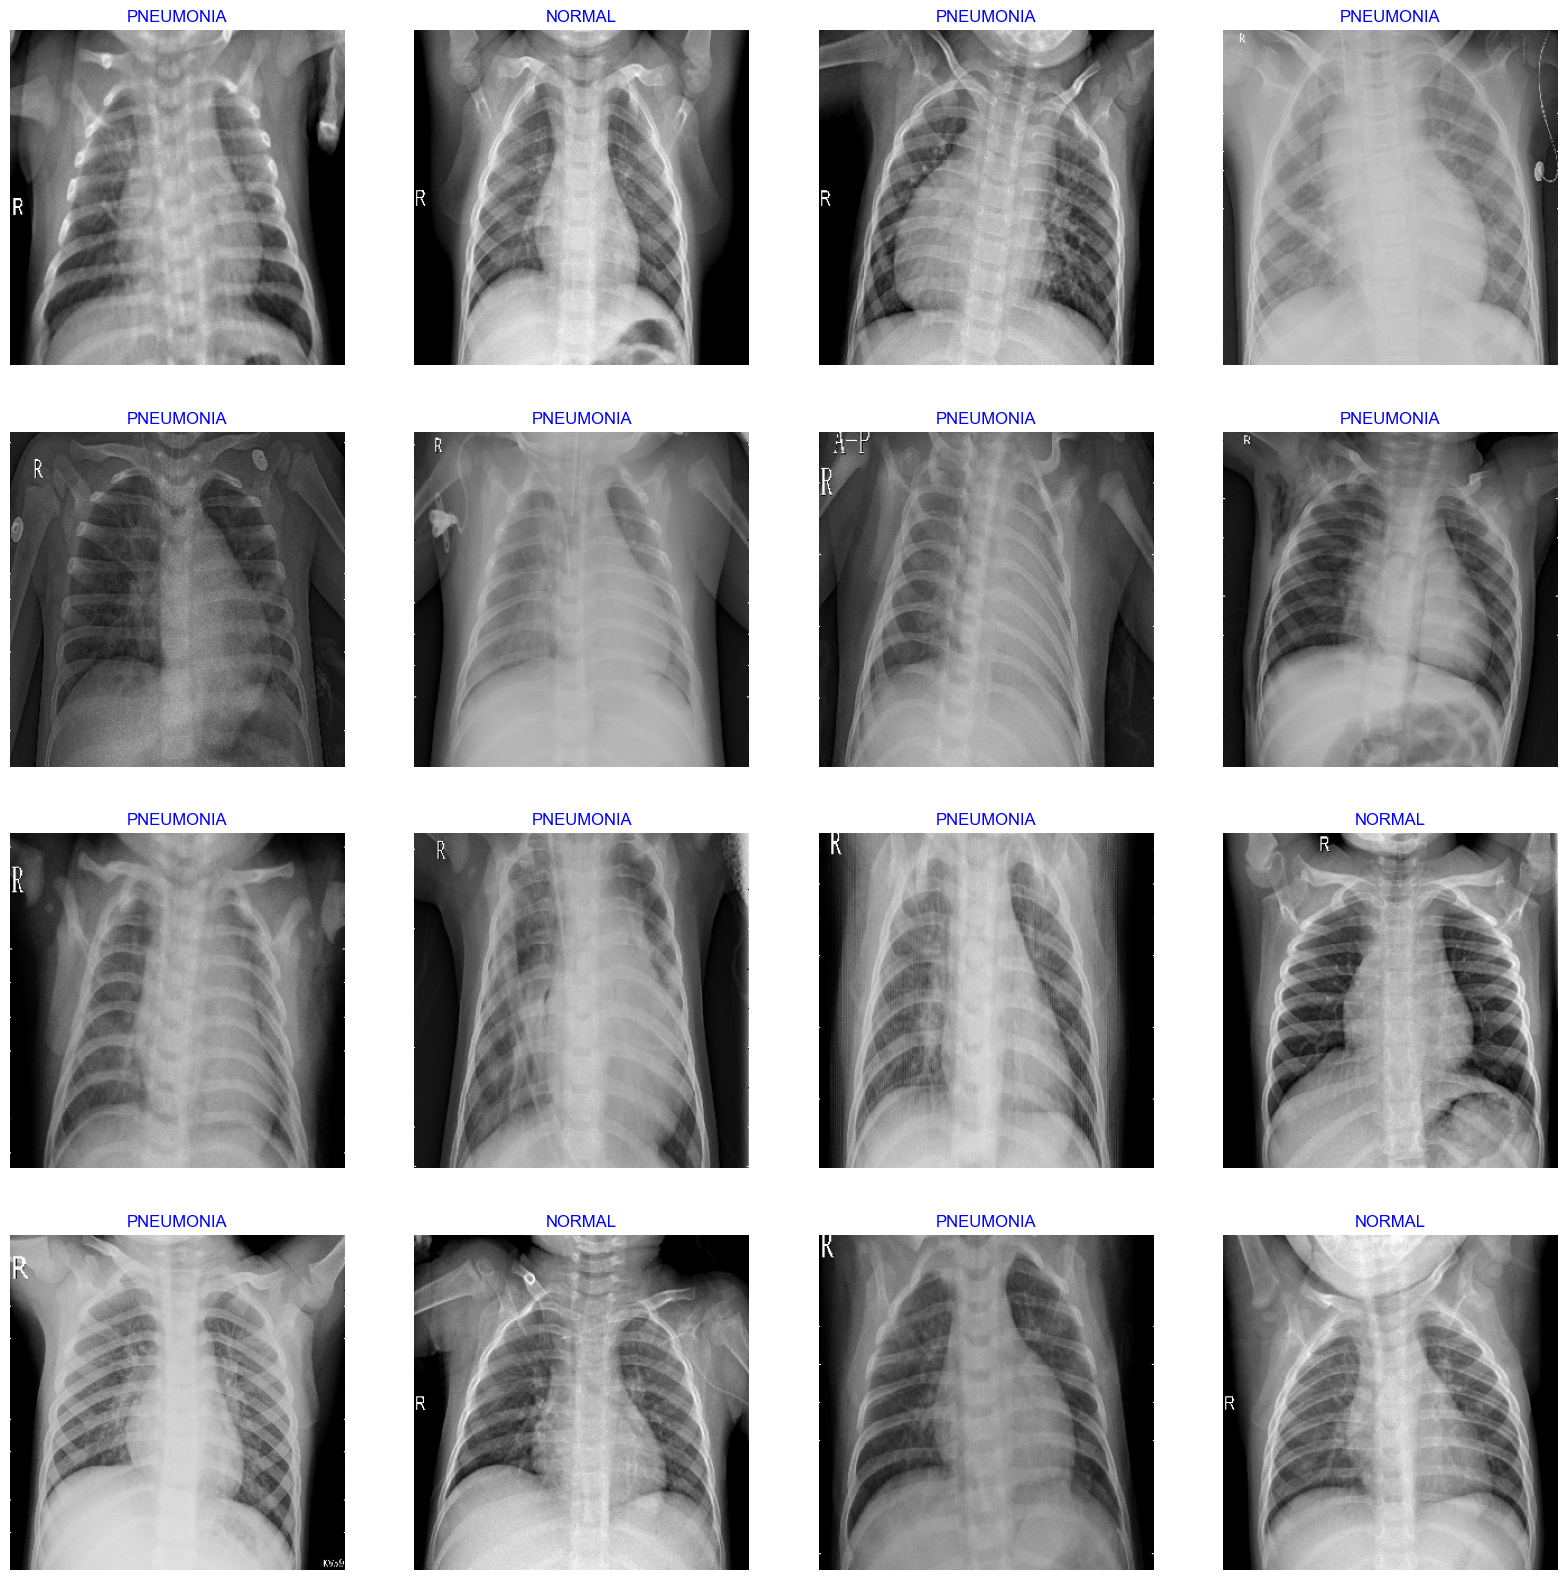

In [51]:
g_dict = train_gen.class_indices      # defines dictionary {'class': index}
classes = list(g_dict.keys())       # defines list of dictionary's kays (classes), classes names : string
images, labels = next(train_gen)      # get a batch size samples from the generator

plt.figure(figsize= (20, 20))

for i in range(16):
    plt.subplot(4, 4, i + 1)
    image = images[i] / 255       # scales data to range (0 - 255)
    plt.imshow(image)
    index = np.argmax(labels[i])  # get image index
    class_name = classes[index]   # get class of image
    plt.title(class_name, color= 'blue', fontsize= 12)
    plt.axis('off')

### Inception v4 - Adamax optimizer 

In [52]:
model_t = create_model()
model_t.compile(Adamax(learning_rate= 0.001), loss='binary_crossentropy', metrics=['accuracy'])
model_t.summary()

Model: "inception_v4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_298 (Conv2D)            (None, 149, 149, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_298 (Batch  (None, 149, 149, 32  96         ['conv2d_298[0][0]']             
 Normalization)                 )                                                      

 activation_303 (Activation)    (None, 71, 71, 96)   0           ['batch_normalization_303[0][0]']
                                                                                                  
 activation_307 (Activation)    (None, 71, 71, 96)   0           ['batch_normalization_307[0][0]']
                                                                                                  
 concatenate_51 (Concatenate)   (None, 71, 71, 192)  0           ['activation_303[0][0]',         
                                                                  'activation_307[0][0]']         
                                                                                                  
 conv2d_308 (Conv2D)            (None, 35, 35, 192)  331776      ['concatenate_51[0][0]']         
                                                                                                  
 batch_normalization_308 (Batch  (None, 35, 35, 192)  576        ['conv2d_308[0][0]']             
 Normaliza

 conv2d_317 (Conv2D)            (None, 35, 35, 64)   24576       ['concatenate_53[0][0]']         
                                                                                                  
 conv2d_320 (Conv2D)            (None, 35, 35, 96)   55296       ['activation_319[0][0]']         
                                                                                                  
 batch_normalization_317 (Batch  (None, 35, 35, 64)  192         ['conv2d_317[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_320 (Batch  (None, 35, 35, 96)  288         ['conv2d_320[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activatio

 Normalization)                                                                                   
                                                                                                  
 batch_normalization_325 (Batch  (None, 35, 35, 96)  288         ['conv2d_325[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_328 (Batch  (None, 35, 35, 96)  288         ['conv2d_328[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_329 (Batch  (None, 35, 35, 96)  288         ['conv2d_329[0][0]']             
 Normalization)                                                                                   
          

 batch_normalization_338 (Batch  (None, 35, 35, 192)  576        ['conv2d_338[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_338 (Activation)    (None, 35, 35, 192)  0           ['batch_normalization_338[0][0]']
                                                                                                  
 conv2d_339 (Conv2D)            (None, 35, 35, 224)  387072      ['activation_338[0][0]']         
                                                                                                  
 batch_normalization_339 (Batch  (None, 35, 35, 224)  672        ['conv2d_339[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activatio

                                                                                                  
 conv2d_350 (Conv2D)            (None, 17, 17, 128)  131072      ['average_pooling2d_34[0][0]']   
                                                                                                  
 batch_normalization_341 (Batch  (None, 17, 17, 384)  1152       ['conv2d_341[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_344 (Batch  (None, 17, 17, 256)  768        ['conv2d_344[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_349 (Batch  (None, 17, 17, 256)  768        ['conv2d_349[0][0]']             
 Normaliza

                                                                                                  
 batch_normalization_354 (Batch  (None, 17, 17, 256)  768        ['conv2d_354[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_359 (Batch  (None, 17, 17, 256)  768        ['conv2d_359[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_360 (Batch  (None, 17, 17, 128)  384        ['conv2d_360[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activatio

 Normalization)                                                                                   
                                                                                                  
 batch_normalization_370 (Batch  (None, 17, 17, 128)  384        ['conv2d_370[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_361 (Activation)    (None, 17, 17, 384)  0           ['batch_normalization_361[0][0]']
                                                                                                  
 activation_364 (Activation)    (None, 17, 17, 256)  0           ['batch_normalization_364[0][0]']
                                                                                                  
 activation_369 (Activation)    (None, 17, 17, 256)  0           ['batch_normalization_369[0][0]']
          

 activation_371 (Activation)    (None, 17, 17, 384)  0           ['batch_normalization_371[0][0]']
                                                                                                  
 activation_374 (Activation)    (None, 17, 17, 256)  0           ['batch_normalization_374[0][0]']
                                                                                                  
 activation_379 (Activation)    (None, 17, 17, 256)  0           ['batch_normalization_379[0][0]']
                                                                                                  
 activation_380 (Activation)    (None, 17, 17, 128)  0           ['batch_normalization_380[0][0]']
                                                                                                  
 concatenate_61 (Concatenate)   (None, 17, 17, 1024  0           ['activation_371[0][0]',         
                                )                                 'activation_374[0][0]',         
          

                                                                                                  
 activation_390 (Activation)    (None, 17, 17, 128)  0           ['batch_normalization_390[0][0]']
                                                                                                  
 concatenate_62 (Concatenate)   (None, 17, 17, 1024  0           ['activation_381[0][0]',         
                                )                                 'activation_384[0][0]',         
                                                                  'activation_389[0][0]',         
                                                                  'activation_390[0][0]']         
                                                                                                  
 conv2d_395 (Conv2D)            (None, 17, 17, 192)  196608      ['concatenate_62[0][0]']         
                                                                                                  
 batch_nor

                                                                  'activation_399[0][0]',         
                                                                  'activation_400[0][0]']         
                                                                                                  
 conv2d_405 (Conv2D)            (None, 17, 17, 192)  196608      ['concatenate_63[0][0]']         
                                                                                                  
 batch_normalization_405 (Batch  (None, 17, 17, 192)  576        ['conv2d_405[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_405 (Activation)    (None, 17, 17, 192)  0           ['batch_normalization_405[0][0]']
                                                                                                  
 conv2d_40

 batch_normalization_413 (Batch  (None, 17, 17, 256)  768        ['conv2d_413[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_413 (Activation)    (None, 17, 17, 256)  0           ['batch_normalization_413[0][0]']
                                                                                                  
 conv2d_414 (Conv2D)            (None, 17, 17, 256)  458752      ['activation_413[0][0]']         
                                                                                                  
 batch_normalization_414 (Batch  (None, 17, 17, 256)  768        ['conv2d_414[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activatio

 average_pooling2d_41 (AverageP  (None, 8, 8, 1536)  0           ['concatenate_65[0][0]']         
 ooling2D)                                                                                        
                                                                                                  
 conv2d_417 (Conv2D)            (None, 8, 8, 256)    393216      ['concatenate_65[0][0]']         
                                                                                                  
 batch_normalization_419 (Batch  (None, 8, 8, 256)   768         ['conv2d_419[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_420 (Batch  (None, 8, 8, 256)   768         ['conv2d_420[0][0]']             
 Normalization)                                                                                   
          

                                                                                                  
 average_pooling2d_42 (AverageP  (None, 8, 8, 1536)  0           ['concatenate_68[0][0]']         
 ooling2D)                                                                                        
                                                                                                  
 conv2d_427 (Conv2D)            (None, 8, 8, 256)    393216      ['concatenate_68[0][0]']         
                                                                                                  
 batch_normalization_429 (Batch  (None, 8, 8, 256)   768         ['conv2d_429[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_430 (Batch  (None, 8, 8, 256)   768         ['conv2d_430[0][0]']             
 Normaliza

 conv2d_445 (Conv2D)            (None, 8, 8, 256)    393216      ['activation_443[0][0]']         
                                                                                                  
 average_pooling2d_43 (AverageP  (None, 8, 8, 1536)  0           ['concatenate_71[0][0]']         
 ooling2D)                                                                                        
                                                                                                  
 conv2d_437 (Conv2D)            (None, 8, 8, 256)    393216      ['concatenate_71[0][0]']         
                                                                                                  
 batch_normalization_439 (Batch  (None, 8, 8, 256)   768         ['conv2d_439[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_nor

In [53]:
hist = model_t.fit(x= train_gen, epochs= 10, verbose= 1, validation_data= val_gen, 
                    validation_steps= None, shuffle= False, batch_size=32)
print(hist.history)
best_score = max(hist.history['val_accuracy'])
print(f"Best Validation score is: {best_score}")



Epoch 1/10
261/261 [==============================] - 117s 424ms/step - loss: 2.7635 - accuracy: 0.8905 - val_loss: 42786.9375 - val_accuracy: 0.2636
Epoch 2/10
261/261 [==============================] - 46s 175ms/step - loss: 2.5649 - accuracy: 0.9473 - val_loss: 4484.8403 - val_accuracy: 0.2636
Epoch 3/10
261/261 [==============================] - 46s 177ms/step - loss: 2.4487 - accuracy: 0.9537 - val_loss: 758.7749 - val_accuracy: 0.2636
Epoch 4/10
261/261 [==============================] - 47s 180ms/step - loss: 2.3083 - accuracy: 0.9688 - val_loss: 126.5254 - val_accuracy: 0.2636
Epoch 5/10
261/261 [==============================] - 46s 176ms/step - loss: 2.1838 - accuracy: 0.9729 - val_loss: 86.6125 - val_accuracy: 0.2652
Epoch 6/10
261/261 [==============================] - 46s 176ms/step - loss: 2.0645 - accuracy: 0.9751 - val_loss: 17.6948 - val_accuracy: 0.2668
Epoch 7/10
261/261 [==============================] - 46s 177ms/step - loss: 1.9405 - accuracy: 0.9767 - val_loss: 4

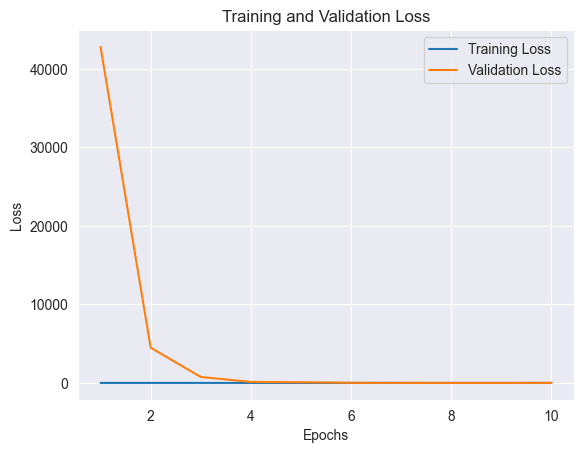

In [58]:
# Extract the training and validation loss values from the history object
train_loss = hist.history['loss']
val_loss = hist.history['val_loss']

# Create a list of epoch numbers (1 to number of epochs)
epochs = range(1, len(train_loss) + 1)

# Plot the loss graph
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

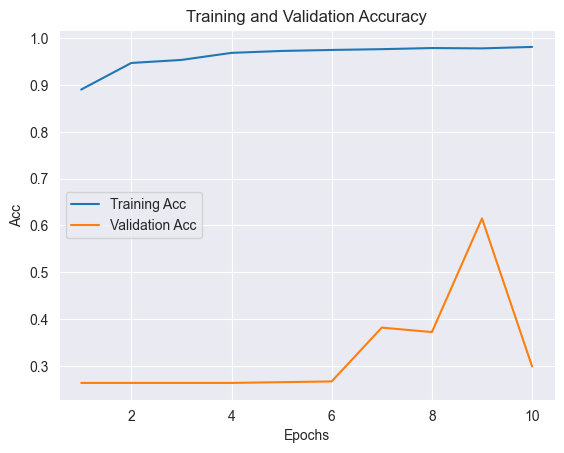

In [59]:
# Extract the training and validation loss values from the history object
train_accuracy = hist.history['accuracy']
val_accuracy = hist.history['val_accuracy']

# Create a list of epoch numbers (1 to number of epochs)
epochs = range(1, len(train_accuracy) + 1)

# Plot the loss graph
plt.plot(epochs, train_accuracy , label='Training Acc')
plt.plot(epochs, val_accuracy, label='Validation Acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.grid(True)
plt.show()


In [60]:
#evaluate model
ts_length = len(test_df)
test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
test_steps = ts_length // test_batch_size

train_score = model_t.evaluate(train_gen, steps= test_steps, verbose= 1)
val_score = model_t.evaluate(val_gen, steps= test_steps, verbose= 1)
test_score = model_t.evaluate(test_gen, steps= test_steps, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", val_score[0])
print("Validation Accuracy: ", val_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

11/11 [==============================] - 4s 386ms/step - loss: 6.3154 - accuracy: 0.2799
Train Loss:  6.138576984405518
Train Accuracy:  0.2613636255264282
--------------------
Validation Loss:  6.008507251739502
Validation Accuracy:  0.3068181872367859
--------------------
Test Loss:  6.315400123596191
Test Accuracy:  0.279904305934906


In [61]:
preds = model_t.predict_generator(test_gen)
y_pred = np.argmax(preds, axis=1)

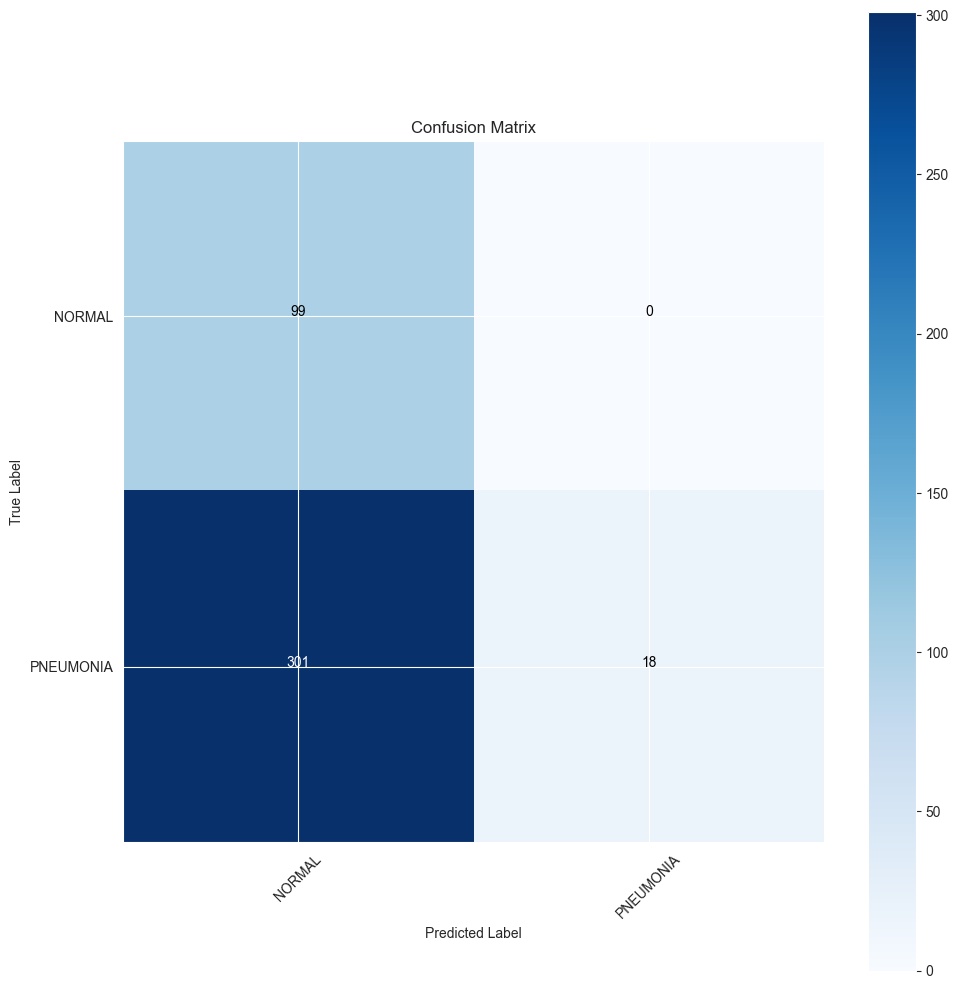

In [62]:
g_dict = test_gen.class_indices
classes = list(g_dict.keys())

# Confusion matrix
cm = confusion_matrix(test_gen.classes, y_pred)

plt.figure(figsize= (10, 10))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()

In [63]:
# Classification report
print(classification_report(test_gen.classes, y_pred, target_names= classes))

              precision    recall  f1-score   support

      NORMAL       0.25      1.00      0.40        99
   PNEUMONIA       1.00      0.06      0.11       319

    accuracy                           0.28       418
   macro avg       0.62      0.53      0.25       418
weighted avg       0.82      0.28      0.18       418



### Inception V4 (Adam optimizer) With pre-trained weight 

In [75]:
#Train with Adam Optimizer
def define_model(width, height):
    model_input = tf.keras.layers.Input(shape=(width, height, 3), name='image_input')
    model_main = inception_v4(num_classes=2, weights='imagenet', dropout_keep_prob=0, include_top=False)(model_input)
    model_dense1 = tf.keras.layers.Flatten()(model_main)
    model_dense2 = tf.keras.layers.Dense(128, activation='relu')(model_dense1)
    model_out = tf.keras.layers.Dense(2, activation="sigmoid")(model_dense2)

    model = tf.keras.models.Model(model_input,  model_out)
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.00004, beta_1=0.9, beta_2=0.999)
    model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    return model

In [76]:
def define_callbacks():
    save_callback = tf.keras.callbacks.ModelCheckpoint(
        filepath='model.h5',
        monitor='val_acc',
        save_best_only=True,
        verbose=1
    )

    return save_callback

In [77]:
nb_epoch     = 10
batch_size   = 16
width        = 299
height       = 299

In [78]:
model = define_model(width, height)
model.summary()
save_callback = define_callbacks()

165780176/165780176 [==============================] - 4s 0us/step
Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 image_input (InputLayer)    [(None, 299, 299, 3)]     0         
                                                                 
 inception_v4 (Functional)   (None, 8, 8, 1536)        41174400  
                                                                 
 flatten_5 (Flatten)         (None, 98304)             0         
                                                                 
 dense_6 (Dense)             (None, 128)               12583040  
                                                                 
 dense_7 (Dense)             (None, 2)                 258       
                                                                 
Total params: 53,757,698
Trainable params: 53,694,530
Non-trainable params: 63,168
_________________________________________

In [79]:
hist = model.fit(x= train_gen, epochs= 10, verbose= 1, validation_data= val_gen, 
                    validation_steps= None, shuffle= False, batch_size=16, callbacks=[save_callback])
print(hist.history)
best_score = max(hist.history['val_accuracy'])
print(f"Best Validation score is: {best_score}")



Epoch 1/10
261/261 [==============================] - 62s 212ms/step - loss: 3.0095 - accuracy: 0.8066 - val_loss: 4.4910 - val_accuracy: 0.7364
Epoch 2/10
261/261 [==============================] - 45s 171ms/step - loss: 2.8225 - accuracy: 0.8727 - val_loss: 5.0733 - val_accuracy: 0.7364
Epoch 3/10
261/261 [==============================] - 53s 203ms/step - loss: 2.7961 - accuracy: 0.8897 - val_loss: 7.6060 - val_accuracy: 0.7364
Epoch 4/10
261/261 [==============================] - 45s 172ms/step - loss: 2.7637 - accuracy: 0.9063 - val_loss: 4.0089 - val_accuracy: 0.7348
Epoch 5/10
261/261 [==============================] - 45s 174ms/step - loss: 2.7424 - accuracy: 0.9173 - val_loss: 4.4650 - val_accuracy: 0.2668
Epoch 6/10
261/261 [==============================] - 46s 174ms/step - loss: 2.7426 - accuracy: 0.9163 - val_loss: 5.1464 - val_accuracy: 0.2700
Epoch 7/10
261/261 [==============================] - 45s 172ms/step - loss: 2.6993 - accuracy: 0.9288 - val_loss: 3.1920 - val_ac

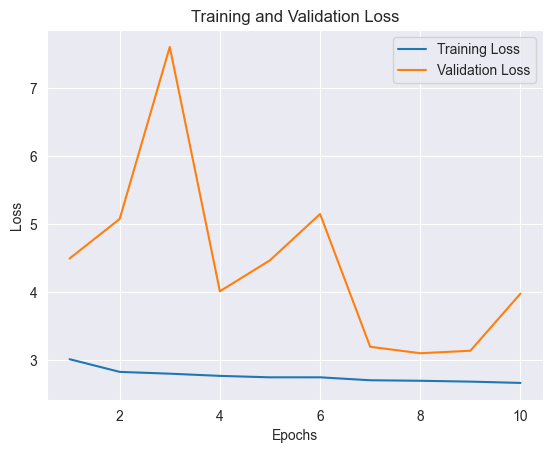

In [80]:
# Extract the training and validation loss values from the history object
train_loss = hist.history['loss']
val_loss = hist.history['val_loss']

# Create a list of epoch numbers (1 to number of epochs)
epochs = range(1, len(train_loss) + 1)

# Plot the loss graph
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

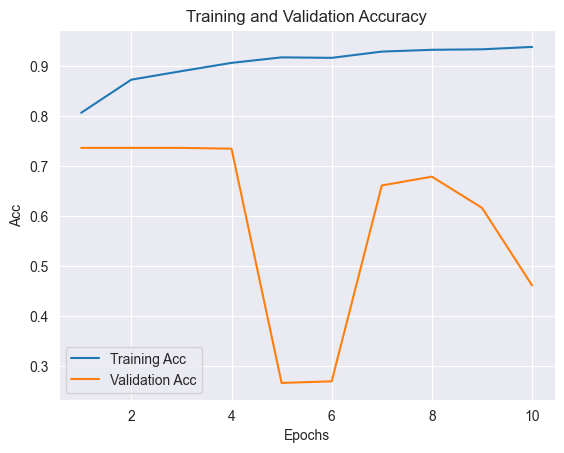

In [81]:
# Extract the training and validation loss values from the history object
train_accuracy = hist.history['accuracy']
val_accuracy = hist.history['val_accuracy']

# Create a list of epoch numbers (1 to number of epochs)
epochs = range(1, len(train_accuracy) + 1)

# Plot the loss graph
plt.plot(epochs, train_accuracy , label='Training Acc')
plt.plot(epochs, val_accuracy, label='Validation Acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.grid(True)
plt.show()


In [82]:
#evaluate model
ts_length = len(test_df)
test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
test_steps = ts_length // test_batch_size

train_score = model_t.evaluate(train_gen, steps= test_steps, verbose= 1)
val_score = model_t.evaluate(val_gen, steps= test_steps, verbose= 1)
test_score = model_t.evaluate(test_gen, steps= test_steps, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", val_score[0])
print("Validation Accuracy: ", val_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

11/11 [==============================] - 4s 379ms/step - loss: 6.3154 - accuracy: 0.2799
Train Loss:  6.134957790374756
Train Accuracy:  0.34659090638160706
--------------------
Validation Loss:  5.642849922180176
Validation Accuracy:  0.3181818127632141
--------------------
Test Loss:  6.315400123596191
Test Accuracy:  0.279904305934906


In [83]:
preds = model_t.predict_generator(test_gen)
y_pred = np.argmax(preds, axis=1)

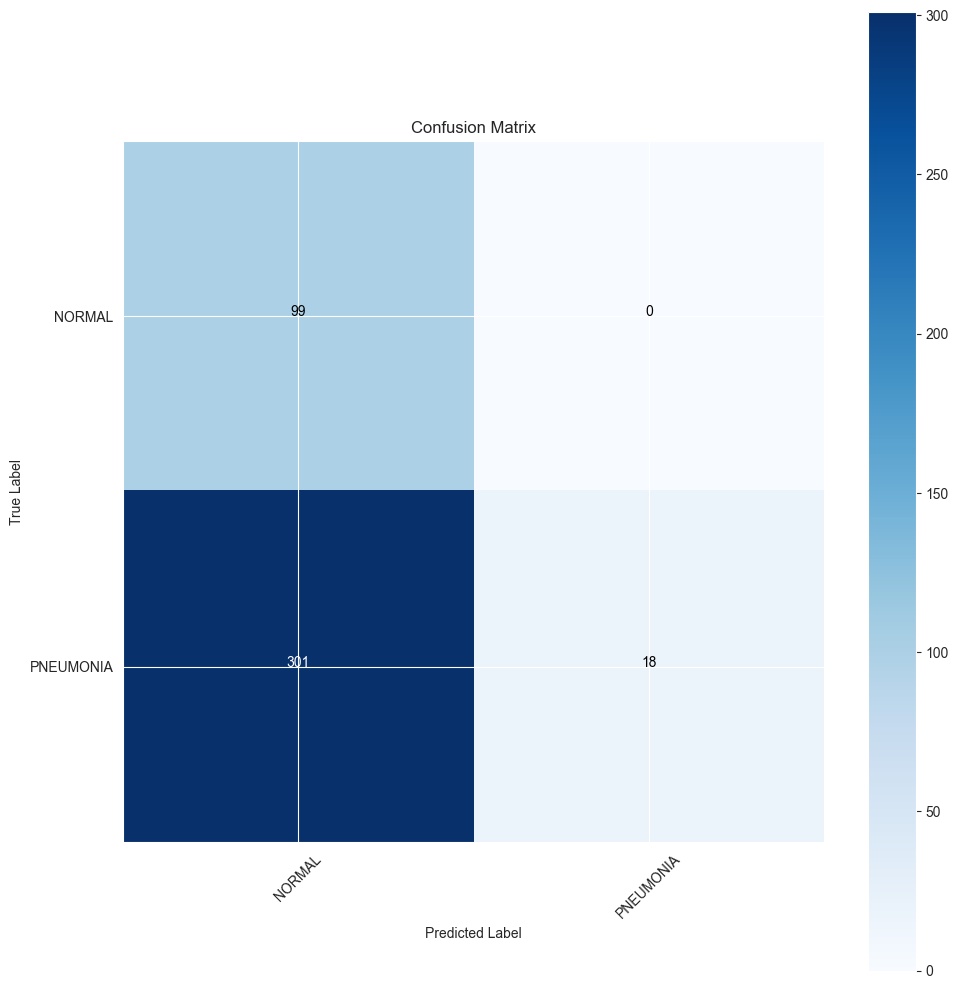

In [84]:
g_dict = test_gen.class_indices
classes = list(g_dict.keys())

# Confusion matrix
cm = confusion_matrix(test_gen.classes, y_pred)

plt.figure(figsize= (10, 10))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()

In [74]:
# Classification report
print(classification_report(test_gen.classes, y_pred, target_names= classes))

              precision    recall  f1-score   support

      NORMAL       0.25      1.00      0.40        99
   PNEUMONIA       1.00      0.06      0.11       319

    accuracy                           0.28       418
   macro avg       0.62      0.53      0.25       418
weighted avg       0.82      0.28      0.18       418



### Use Early Stopping and Change to SoftMAX

In [ ]:
def define_model(width, height):
    model_input = tf.keras.layers.Input(shape=(width, height, 3), name='image_input')
    model_main = inception_v4(num_classes=2, weights='imagenet', dropout_keep_prob=0, include_top=False)(model_input)
    model_dense1 = tf.keras.layers.Flatten()(model_main)
    model_dense2 = tf.keras.layers.Dense(128, activation='relu')(model_dense1)
    model_out = tf.keras.layers.Dense(2, activation="softmax")(model_dense2)

    model = tf.keras.models.Model(model_input,  model_out)
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.00004, beta_1=0.9, beta_2=0.999)
    model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    return model

In [85]:
nb_epoch     = 10
batch_size   = 16
width        = 299
height       = 299

In [86]:
model = define_model(width, height)
model.summary()
save_callback = define_callbacks()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 image_input (InputLayer)    [(None, 299, 299, 3)]     0         
                                                                 
 inception_v4 (Functional)   (None, 8, 8, 1536)        41174400  
                                                                 
 flatten_6 (Flatten)         (None, 98304)             0         
                                                                 
 dense_8 (Dense)             (None, 128)               12583040  
                                                                 
 dense_9 (Dense)             (None, 2)                 258       
                                                                 
Total params: 53,757,698
Trainable params: 53,694,530
Non-trainable params: 63,168
_________________________________________________________________


In [90]:
hist = model.fit(x= train_gen, epochs= 10, verbose= 1, validation_data= val_gen, 
                    validation_steps= None, shuffle= False, batch_size=16, callbacks=[custom_early_stopping])
print(hist.history)
best_score = max(hist.history['val_accuracy'])
print(f"Best Validation score is: {best_score}")



Epoch 1/10
261/261 [==============================] - 61s 212ms/step - loss: 2.9186 - accuracy: 0.8147 - val_loss: 5.4450 - val_accuracy: 0.7364
Epoch 2/10
261/261 [==============================] - 45s 172ms/step - loss: 2.7669 - accuracy: 0.8924 - val_loss: 3.2407 - val_accuracy: 0.5735
Epoch 3/10
261/261 [==============================] - 45s 173ms/step - loss: 2.7399 - accuracy: 0.9072 - val_loss: 3.1963 - val_accuracy: 0.6230
Epoch 4/10
261/261 [==============================] - 45s 173ms/step - loss: 2.7107 - accuracy: 0.9178 - val_loss: 3.1366 - val_accuracy: 0.7109
Epoch 5/10
261/261 [==============================] - 45s 173ms/step - loss: 2.6928 - accuracy: 0.9274 - val_loss: 3.4685 - val_accuracy: 0.7300
{'loss': [2.9186322689056396, 2.7668991088867188, 2.739898204803467, 2.710657835006714, 2.6928281784057617], 'accuracy': [0.814717173576355, 0.8923777341842651, 0.9072387218475342, 0.9177852272987366, 0.9273729920387268], 'val_loss': [5.444979667663574, 3.240652561187744, 3.

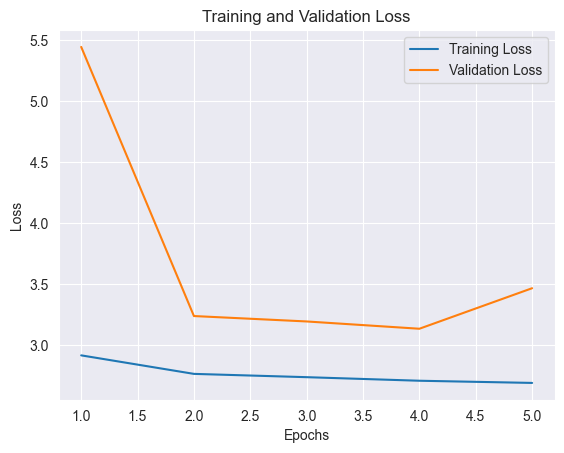

In [91]:
# Extract the training and validation loss values from the history object
train_loss = hist.history['loss']
val_loss = hist.history['val_loss']

# Create a list of epoch numbers (1 to number of epochs)
epochs = range(1, len(train_loss) + 1)

# Plot the loss graph
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

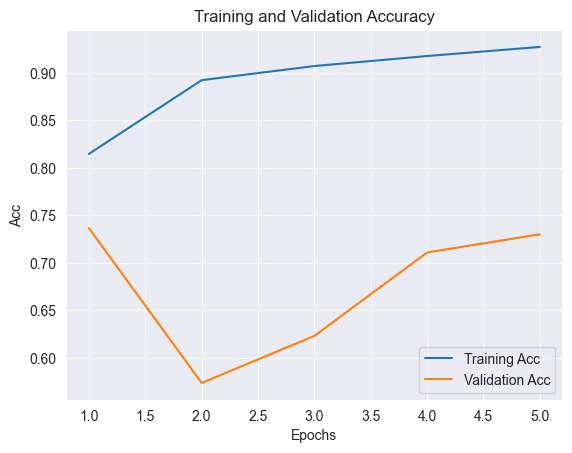

In [92]:
# Extract the training and validation loss values from the history object
train_accuracy = hist.history['accuracy']
val_accuracy = hist.history['val_accuracy']

# Create a list of epoch numbers (1 to number of epochs)
epochs = range(1, len(train_accuracy) + 1)

# Plot the loss graph
plt.plot(epochs, train_accuracy , label='Training Acc')
plt.plot(epochs, val_accuracy, label='Validation Acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.grid(True)
plt.show()


In [93]:
#evaluate model
ts_length = len(test_df)
test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
test_steps = ts_length // test_batch_size

train_score = model_t.evaluate(train_gen, steps= test_steps, verbose= 1)
val_score = model_t.evaluate(val_gen, steps= test_steps, verbose= 1)
test_score = model_t.evaluate(test_gen, steps= test_steps, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", val_score[0])
print("Validation Accuracy: ", val_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

11/11 [==============================] - 4s 378ms/step - loss: 6.3154 - accuracy: 0.2799
Train Loss:  6.180253505706787
Train Accuracy:  0.3295454680919647
--------------------
Validation Loss:  5.830175399780273
Validation Accuracy:  0.2954545319080353
--------------------
Test Loss:  6.315400123596191
Test Accuracy:  0.279904305934906


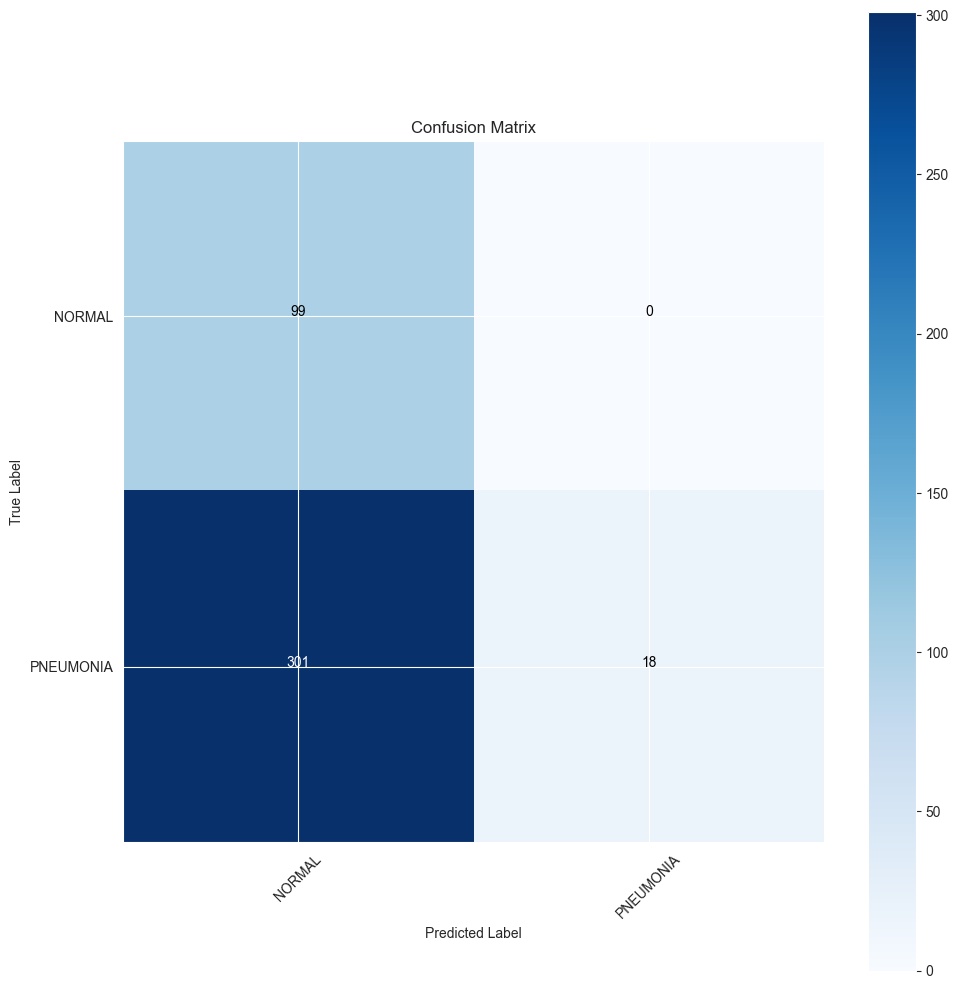

In [94]:
g_dict = test_gen.class_indices
classes = list(g_dict.keys())

# Confusion matrix
cm = confusion_matrix(test_gen.classes, y_pred)

plt.figure(figsize= (10, 10))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()

In [95]:
# Classification report
print(classification_report(test_gen.classes, y_pred, target_names= classes))

              precision    recall  f1-score   support

      NORMAL       0.25      1.00      0.40        99
   PNEUMONIA       1.00      0.06      0.11       319

    accuracy                           0.28       418
   macro avg       0.62      0.53      0.25       418
weighted avg       0.82      0.28      0.18       418



In [89]:
from tensorflow.keras.layers import Concatenate
import tensorflow as tf
from tensorflow.keras.layers import Input, Dropout, Dense, Flatten, Activation, MaxPooling2D, Conv2D, AveragePooling2D, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K

 

from tensorflow.keras import regularizers
from tensorflow.keras import initializers

 

 

#########################################################################################
# Implements the Inception Network v4 (http://arxiv.org/pdf/1602.07261v1.pdf) in Keras. #
#########################################################################################

 

WEIGHTS_PATH = 'https://github.com/kentsommer/keras-inceptionV4/releases/download/2.1/inception-v4_weights_tf_dim_ordering_tf_kernels.h5'
WEIGHTS_PATH_NO_TOP = 'https://github.com/kentsommer/keras-inceptionV4/releases/download/2.1/inception-v4_weights_tf_dim_ordering_tf_kernels_notop.h5'

 

 

def preprocess_input(x):
    x = np.divide(x, 255.0)
    x = np.subtract(x, 0.5)
    x = np.multiply(x, 2.0)
    return x

 

 

def conv2d_bn(x, nb_filter, num_row, num_col,
              padding='same', strides=(1, 1), use_bias=False):
    """
    Utility function to apply conv + BN. 
    (Slightly modified from https://github.com/fchollet/keras/blob/master/keras/applications/inception_v3.py)
    """
    if K.image_data_format() == 'channels_first':
        channel_axis = 1
    else:
        channel_axis = -1
    x = Conv2D(nb_filter, (num_row, num_col),
                      strides=strides,
                      padding=padding,
                      use_bias=use_bias,
                      kernel_regularizer=regularizers.l2(0.00004),
                      kernel_initializer=initializers.VarianceScaling(scale=2.0, mode='fan_in', distribution='normal', seed=None))(x)
    x = BatchNormalization(axis=channel_axis, momentum=0.9997, scale=False)(x)
    x = Activation('relu')(x)
    return x

 

 

def block_inception_a(input):
    if K.image_data_format() == 'channels_first':
        channel_axis = 1
    else:
        channel_axis = -1

 

    branch_0 = conv2d_bn(input, 96, 1, 1)

 

    branch_1 = conv2d_bn(input, 64, 1, 1)
    branch_1 = conv2d_bn(branch_1, 96, 3, 3)

 

    branch_2 = conv2d_bn(input, 64, 1, 1)
    branch_2 = conv2d_bn(branch_2, 96, 3, 3)
    branch_2 = conv2d_bn(branch_2, 96, 3, 3)

 

    branch_3 = AveragePooling2D((3,3), strides=(1,1), padding='same')(input)
    branch_3 = conv2d_bn(branch_3, 96, 1, 1)

 

#    x = Concatenate([branch_0, branch_1, branch_2, branch_3], axis=channel_axis)
    x = Concatenate(axis=channel_axis)([branch_0, branch_1, branch_2, branch_3])
    return x

 

 

def block_reduction_a(input):
    if K.image_data_format() == 'channels_first':
        channel_axis = 1
    else:
        channel_axis = -1

 

    branch_0 = conv2d_bn(input, 384, 3, 3, strides=(2,2), padding='valid')

 

    branch_1 = conv2d_bn(input, 192, 1, 1)
    branch_1 = conv2d_bn(branch_1, 224, 3, 3)
    branch_1 = conv2d_bn(branch_1, 256, 3, 3, strides=(2,2), padding='valid')

 

    branch_2 = MaxPooling2D((3,3), strides=(2,2), padding='valid')(input)

 

    x = Concatenate(axis=channel_axis)([branch_0, branch_1, branch_2])
    return x

 

 

def block_inception_b(input):
    if K.image_data_format() == 'channels_first':
        channel_axis = 1
    else:
        channel_axis = -1

 

    branch_0 = conv2d_bn(input, 384, 1, 1)

 

    branch_1 = conv2d_bn(input, 192, 1, 1)
    branch_1 = conv2d_bn(branch_1, 224, 1, 7)
    branch_1 = conv2d_bn(branch_1, 256, 7, 1)

 

    branch_2 = conv2d_bn(input, 192, 1, 1)
    branch_2 = conv2d_bn(branch_2, 192, 7, 1)
    branch_2 = conv2d_bn(branch_2, 224, 1, 7)
    branch_2 = conv2d_bn(branch_2, 224, 7, 1)
    branch_2 = conv2d_bn(branch_2, 256, 1, 7)

 

    branch_3 = AveragePooling2D((3,3), strides=(1,1), padding='same')(input)
    branch_3 = conv2d_bn(branch_3, 128, 1, 1)

 

    
    x = Concatenate(axis=channel_axis)([branch_0, branch_1, branch_2, branch_3])
    return x

 

 

def block_reduction_b(input):
    if K.image_data_format() == 'channels_first':
        channel_axis = 1
    else:
        channel_axis = -1

 

    branch_0 = conv2d_bn(input, 192, 1, 1)
    branch_0 = conv2d_bn(branch_0, 192, 3, 3, strides=(2, 2), padding='valid')

 

    branch_1 = conv2d_bn(input, 256, 1, 1)
    branch_1 = conv2d_bn(branch_1, 256, 1, 7)
    branch_1 = conv2d_bn(branch_1, 320, 7, 1)
    branch_1 = conv2d_bn(branch_1, 320, 3, 3, strides=(2,2), padding='valid')

 

    branch_2 = MaxPooling2D((3, 3), strides=(2, 2), padding='valid')(input)
    x = Concatenate(axis=channel_axis)([branch_0, branch_1, branch_2])

 

    
    return x

 

 

def block_inception_c(input):
    if K.image_data_format() == 'channels_first':
        channel_axis = 1
    else:
        channel_axis = -1

 

    branch_0 = conv2d_bn(input, 256, 1, 1)

 

    branch_1 = conv2d_bn(input, 384, 1, 1)
    branch_10 = conv2d_bn(branch_1, 256, 1, 3)
    branch_11 = conv2d_bn(branch_1, 256, 3, 1)

 

    branch_1 = Concatenate(axis=channel_axis)([branch_10, branch_11])

 

 

    branch_2 = conv2d_bn(input, 384, 1, 1)
    branch_2 = conv2d_bn(branch_2, 448, 3, 1)
    branch_2 = conv2d_bn(branch_2, 512, 1, 3)
    branch_20 = conv2d_bn(branch_2, 256, 1, 3)
    branch_21 = conv2d_bn(branch_2, 256, 3, 1)
    branch_2 = Concatenate(axis=channel_axis)([branch_20, branch_21])

 

    branch_3 = AveragePooling2D((3, 3), strides=(1, 1), padding='same')(input)
    branch_3 = conv2d_bn(branch_3, 256, 1, 1)
    x = Concatenate(axis=channel_axis)([branch_0, branch_1, branch_2, branch_3])

 

    
    return x

 

 

def inception_v4_base(input):
    if K.image_data_format() == 'channels_first':
        channel_axis = 1
    else:
        channel_axis = -1

 

    # Input Shape is 299 x 299 x 3 (th) or 3 x 299 x 299 (th)
    net = conv2d_bn(input, 32, 3, 3, strides=(2,2), padding='valid')
    net = conv2d_bn(net, 32, 3, 3, padding='valid')
    net = conv2d_bn(net, 64, 3, 3)

 

    branch_0 = MaxPooling2D((3,3), strides=(2,2), padding='valid')(net)

 

    branch_1 = conv2d_bn(net, 96, 3, 3, strides=(2,2), padding='valid')

 

    net = Concatenate(axis=channel_axis)([branch_0, branch_1])
    branch_0 = conv2d_bn(net, 64, 1, 1)
    branch_0 = conv2d_bn(branch_0, 96, 3, 3, padding='valid')

 

    branch_1 = conv2d_bn(net, 64, 1, 1)
    branch_1 = conv2d_bn(branch_1, 64, 1, 7)
    branch_1 = conv2d_bn(branch_1, 64, 7, 1)
    branch_1 = conv2d_bn(branch_1, 96, 3, 3, padding='valid')
    net = Concatenate(axis=channel_axis)([branch_0, branch_1])

 

 

    branch_0 = conv2d_bn(net, 192, 3, 3, strides=(2,2), padding='valid')
    branch_1 = MaxPooling2D((3,3), strides=(2,2), padding='valid')(net)

 

    net = Concatenate(axis=channel_axis)([branch_0, branch_1])

 

    # 35 x 35 x 384
    # 4 x Inception-A blocks
    for idx in range(4):
        net = block_inception_a(net)

 

    # 35 x 35 x 384
    # Reduction-A block
    net = block_reduction_a(net)

 

    # 17 x 17 x 1024
    # 7 x Inception-B blocks
    for idx in range(7):
        net = block_inception_b(net)

 

    # 17 x 17 x 1024
    # Reduction-B block
    net = block_reduction_b(net)

 

    # 8 x 8 x 1536
    # 3 x Inception-C blocks
    for idx in range(3):
        net = block_inception_c(net)

 

    return net

 

 

def inception_v4(num_classes, dropout_keep_prob, weights, include_top):
    '''
    Creates the inception v4 network

 

    Args:
        num_classes: number of classes
        dropout_keep_prob: float, the fraction to keep before final layer.

    Returns: 
        logits: the logits outputs of the model.
    '''

 

    # Input Shape is 299 x 299 x 3 (tf) or 3 x 299 x 299 (th)
    if K.image_data_format() == 'channels_first':
        inputs = Input((3, 299, 299))
    else:
        inputs = Input((299, 299, 3))

 

    # Make inception base
    x = inception_v4_base(inputs)

 

 

    # Final pooling and prediction
    if include_top:
        # 1 x 1 x 1536
        x = AveragePooling2D((8,8), padding='valid')(x)
        x = Dropout(dropout_keep_prob)(x)
        x = Flatten()(x)
        # 1536
        x = Dense(units=num_classes, activation='softmax')(x)

 

    model = Model(inputs, x, name='inception_v4')

 

    # load weights
    if weights == 'imagenet':
        if K.image_data_format() == 'channels_first':
            if K.backend() == 'tensorflow':
                warnings.warn('You are using the TensorFlow backend, yet you '
                              'are using the Theano '
                              'image data format convention '
                              '(`image_data_format="channels_first"`). '
                              'For best performance, set '
                              '`image_data_format="channels_last"` in '
                              'your Keras config '
                              'at ~/.keras/keras.json.')
        if include_top:
            weights_path = tf.keras.utils.get_file(
                'inception-v4_weights_tf_dim_ordering_tf_kernels.h5',
                WEIGHTS_PATH,
                cache_subdir='models',
                md5_hash='9fe79d77f793fe874470d84ca6ba4a3b')
        else:
            weights_path = tf.keras.utils.get_file(
                'inception-v4_weights_tf_dim_ordering_tf_kernels_notop.h5',
                WEIGHTS_PATH_NO_TOP,
                cache_subdir='models',
                md5_hash='9296b46b5971573064d12e4669110969')
        model.load_weights(weights_path, by_name=True)
    return model

 

 

def create_model(num_classes=2, dropout_prob=0.2, weights=None, include_top=True):
    return inception_v4(num_classes, dropout_prob, weights, include_top)

In [90]:
#Implement Early stopping

In [88]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping()

In [89]:
custom_early_stopping = EarlyStopping(
    monitor='val_accuracy', 
    patience=4, 
    min_delta=0.001,
    restore_best_weights=True,
    mode='max'
)

In [93]:
model_t = create_model()
model_t.compile(Adamax(learning_rate= 0.001), loss='binary_crossentropy', metrics=['accuracy'])
model_t.summary()

Model: "inception_v4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_1043 (Conv2D)           (None, 149, 149, 32  864         ['input_8[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_1043 (Batc  (None, 149, 149, 32  96         ['conv2d_1043[0][0]']            
 hNormalization)                )                                                      

 batch_normalization_1048 (Batc  (None, 71, 71, 96)  288         ['conv2d_1048[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_normalization_1052 (Batc  (None, 71, 71, 96)  288         ['conv2d_1052[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1048 (Activation)   (None, 71, 71, 96)   0           ['batch_normalization_1048[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1052 (Activation)   (None, 71, 71, 96)   0           ['batch_normalization_1052[0][0]'
          

                                                                 ]                                
                                                                                                  
 activation_1060 (Activation)   (None, 35, 35, 96)   0           ['batch_normalization_1060[0][0]'
                                                                 ]                                
                                                                                                  
 concatenate_178 (Concatenate)  (None, 35, 35, 384)  0           ['activation_1054[0][0]',        
                                                                  'activation_1056[0][0]',        
                                                                  'activation_1059[0][0]',        
                                                                  'activation_1060[0][0]']        
                                                                                                  
 conv2d_10

                                                                                                  
 conv2d_1072 (Conv2D)           (None, 35, 35, 96)   55296       ['activation_1071[0][0]']        
                                                                                                  
 batch_normalization_1069 (Batc  (None, 35, 35, 64)  192         ['conv2d_1069[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_normalization_1072 (Batc  (None, 35, 35, 96)  288         ['conv2d_1072[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1069 (Activation)   (None, 35, 35, 64)   0           ['batch_normalization_1069[0][0]'
          

                                                                                                  
 conv2d_1077 (Conv2D)           (None, 35, 35, 96)   55296       ['activation_1076[0][0]']        
                                                                                                  
 conv2d_1080 (Conv2D)           (None, 35, 35, 96)   82944       ['activation_1079[0][0]']        
                                                                                                  
 conv2d_1081 (Conv2D)           (None, 35, 35, 96)   36864       ['average_pooling2d_108[0][0]']  
                                                                                                  
 batch_normalization_1075 (Batc  (None, 35, 35, 96)  288         ['conv2d_1075[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_nor

 conv2d_1091 (Conv2D)           (None, 17, 17, 192)  258048      ['activation_1090[0][0]']        
                                                                                                  
 batch_normalization_1091 (Batc  (None, 17, 17, 192)  576        ['conv2d_1091[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1091 (Activation)   (None, 17, 17, 192)  0           ['batch_normalization_1091[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_1087 (Conv2D)           (None, 17, 17, 192)  196608      ['concatenate_182[0][0]']        
                                                                                                  
 conv2d_10

 hNormalization)                                                                                  
                                                                                                  
 activation_1100 (Activation)   (None, 17, 17, 192)  0           ['batch_normalization_1100[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_1101 (Conv2D)           (None, 17, 17, 192)  258048      ['activation_1100[0][0]']        
                                                                                                  
 batch_normalization_1101 (Batc  (None, 17, 17, 192)  576        ['conv2d_1101[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activatio

                                                                  'activation_1105[0][0]']        
                                                                                                  
 conv2d_1110 (Conv2D)           (None, 17, 17, 192)  196608      ['concatenate_184[0][0]']        
                                                                                                  
 batch_normalization_1110 (Batc  (None, 17, 17, 192)  576        ['conv2d_1110[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1110 (Activation)   (None, 17, 17, 192)  0           ['batch_normalization_1110[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_11

                                                                 ]                                
                                                                                                  
 concatenate_185 (Concatenate)  (None, 17, 17, 1024  0           ['activation_1106[0][0]',        
                                )                                 'activation_1109[0][0]',        
                                                                  'activation_1114[0][0]',        
                                                                  'activation_1115[0][0]']        
                                                                                                  
 conv2d_1120 (Conv2D)           (None, 17, 17, 192)  196608      ['concatenate_185[0][0]']        
                                                                                                  
 batch_normalization_1120 (Batc  (None, 17, 17, 192)  576        ['conv2d_1120[0][0]']            
 hNormaliz

                                                                                                  
 activation_1124 (Activation)   (None, 17, 17, 256)  0           ['batch_normalization_1124[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1125 (Activation)   (None, 17, 17, 128)  0           ['batch_normalization_1125[0][0]'
                                                                 ]                                
                                                                                                  
 concatenate_186 (Concatenate)  (None, 17, 17, 1024  0           ['activation_1116[0][0]',        
                                )                                 'activation_1119[0][0]',        
                                                                  'activation_1124[0][0]',        
          

 activation_1126 (Activation)   (None, 17, 17, 384)  0           ['batch_normalization_1126[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1129 (Activation)   (None, 17, 17, 256)  0           ['batch_normalization_1129[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1134 (Activation)   (None, 17, 17, 256)  0           ['batch_normalization_1134[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1135 (Activation)   (None, 17, 17, 128)  0           ['batch_normalization_1135[0][0]'
          

 hNormalization)                                                                                  
                                                                                                  
 batch_normalization_1145 (Batc  (None, 17, 17, 128)  384        ['conv2d_1145[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1136 (Activation)   (None, 17, 17, 384)  0           ['batch_normalization_1136[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1139 (Activation)   (None, 17, 17, 256)  0           ['batch_normalization_1139[0][0]'
                                                                 ]                                
          

                                                                                                  
 batch_normalization_1149 (Batc  (None, 17, 17, 256)  768        ['conv2d_1149[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_normalization_1154 (Batc  (None, 17, 17, 256)  768        ['conv2d_1154[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_normalization_1155 (Batc  (None, 17, 17, 128)  384        ['conv2d_1155[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activatio

                                                                                                  
 batch_normalization_1166 (Batc  (None, 8, 8, 384)   1152        ['conv2d_1166[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1166 (Activation)   (None, 8, 8, 384)    0           ['batch_normalization_1166[0][0]'
                                                                 ]                                
                                                                                                  
 conv2d_1167 (Conv2D)           (None, 8, 8, 448)    516096      ['activation_1166[0][0]']        
                                                                                                  
 batch_normalization_1167 (Batc  (None, 8, 8, 448)   1344        ['conv2d_1167[0][0]']            
 hNormaliz

                                                                  'activation_1170[0][0]']        
                                                                                                  
 activation_1171 (Activation)   (None, 8, 8, 256)    0           ['batch_normalization_1171[0][0]'
                                                                 ]                                
                                                                                                  
 concatenate_193 (Concatenate)  (None, 8, 8, 1536)   0           ['activation_1162[0][0]',        
                                                                  'concatenate_191[0][0]',        
                                                                  'concatenate_192[0][0]',        
                                                                  'activation_1171[0][0]']        
                                                                                                  
 conv2d_11

                                                                                                  
 batch_normalization_1181 (Batc  (None, 8, 8, 256)   768         ['conv2d_1181[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1172 (Activation)   (None, 8, 8, 256)    0           ['batch_normalization_1172[0][0]'
                                                                 ]                                
                                                                                                  
 concatenate_194 (Concatenate)  (None, 8, 8, 512)    0           ['activation_1174[0][0]',        
                                                                  'activation_1175[0][0]']        
                                                                                                  
 concatena

 activation_1184 (Activation)   (None, 8, 8, 256)    0           ['batch_normalization_1184[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1185 (Activation)   (None, 8, 8, 256)    0           ['batch_normalization_1185[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1189 (Activation)   (None, 8, 8, 256)    0           ['batch_normalization_1189[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1190 (Activation)   (None, 8, 8, 256)    0           ['batch_normalization_1190[0][0]'
          

In [94]:
hist = model_t.fit(x= train_gen, epochs= 10, verbose= 1, validation_data= val_gen, 
                    validation_steps= None, shuffle= False, batch_size=32, callbacks=[custom_early_stopping])
print(hist.history)
best_score = max(hist.history['val_accuracy'])
print(f"Best Validation score is: {best_score}")



Epoch 1/10
261/261 [==============================] - 58s 195ms/step - loss: 2.7704 - accuracy: 0.9010 - val_loss: 579293.0000 - val_accuracy: 0.2636
Epoch 2/10
261/261 [==============================] - 45s 171ms/step - loss: 2.5786 - accuracy: 0.9384 - val_loss: 76844.7969 - val_accuracy: 0.2636
Epoch 3/10
261/261 [==============================] - 45s 172ms/step - loss: 2.4286 - accuracy: 0.9590 - val_loss: 15712.1279 - val_accuracy: 0.2636
Epoch 4/10
261/261 [==============================] - 45s 172ms/step - loss: 2.3053 - accuracy: 0.9655 - val_loss: 2159.8362 - val_accuracy: 0.2636
Epoch 5/10
261/261 [==============================] - 45s 173ms/step - loss: 2.1728 - accuracy: 0.9712 - val_loss: 346.1238 - val_accuracy: 0.7364
Epoch 6/10
261/261 [==============================] - 45s 172ms/step - loss: 2.0423 - accuracy: 0.9720 - val_loss: 46.2521 - val_accuracy: 0.2636
Epoch 7/10
261/261 [==============================] - 45s 171ms/step - loss: 1.9043 - accuracy: 0.9791 - val_lo

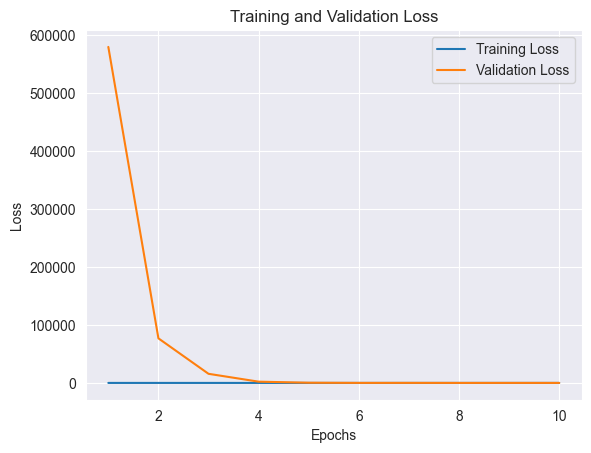

In [95]:
# Extract the training and validation loss values from the history object
train_loss = hist.history['loss']
val_loss = hist.history['val_loss']

# Create a list of epoch numbers (1 to number of epochs)
epochs = range(1, len(train_loss) + 1)

# Plot the loss graph
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

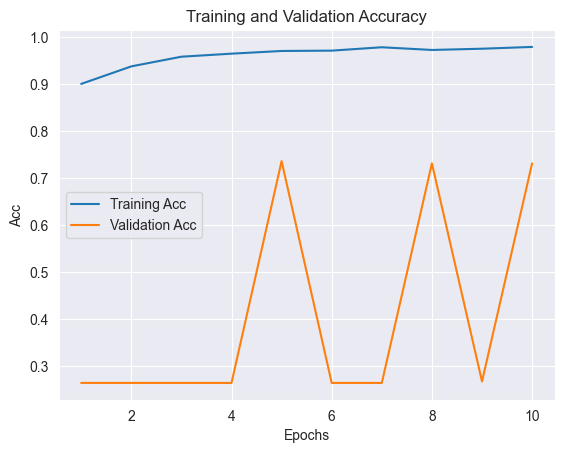

In [96]:
# Extract the training and validation loss values from the history object
train_accuracy = hist.history['accuracy']
val_accuracy = hist.history['val_accuracy']

# Create a list of epoch numbers (1 to number of epochs)
epochs = range(1, len(train_accuracy) + 1)

# Plot the loss graph
plt.plot(epochs, train_accuracy , label='Training Acc')
plt.plot(epochs, val_accuracy, label='Validation Acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.grid(True)
plt.show()


In [97]:
#evaluate model
ts_length = len(test_df)
test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
test_steps = ts_length // test_batch_size

train_score = model_t.evaluate(train_gen, steps= test_steps, verbose= 1)
val_score = model_t.evaluate(val_gen, steps= test_steps, verbose= 1)
test_score = model_t.evaluate(test_gen, steps= test_steps, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", val_score[0])
print("Validation Accuracy: ", val_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

11/11 [==============================] - 4s 375ms/step - loss: 4.5800 - accuracy: 0.7440
Train Loss:  5.153447151184082
Train Accuracy:  0.6875
--------------------
Validation Loss:  5.021679401397705
Validation Accuracy:  0.7215909361839294
--------------------
Test Loss:  4.580020427703857
Test Accuracy:  0.7440191507339478


In [98]:
preds = model_t.predict_generator(test_gen)
y_pred = np.argmax(preds, axis=1)

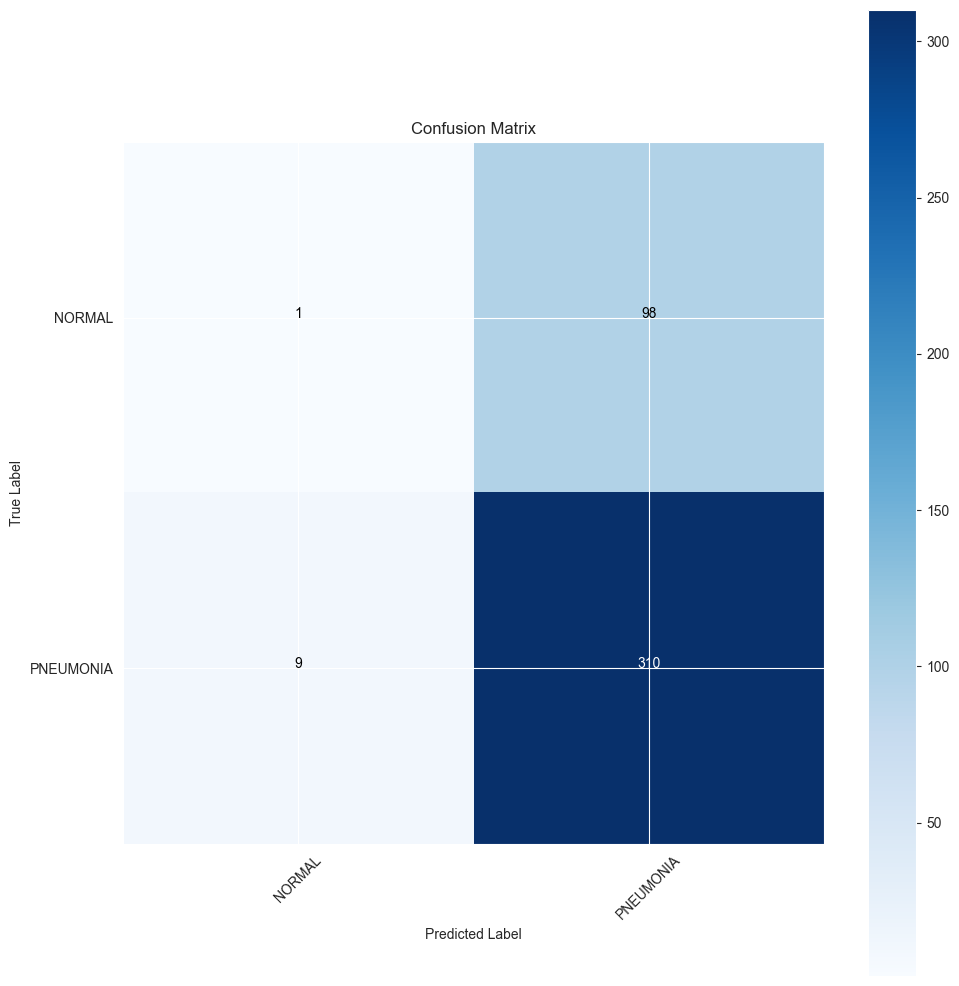

In [99]:
g_dict = test_gen.class_indices
classes = list(g_dict.keys())

# Confusion matrix
cm = confusion_matrix(test_gen.classes, y_pred)

plt.figure(figsize= (10, 10))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()

In [101]:
# Classification report
print("Classification Reoport Using Softmax and Early Stopping")
print(classification_report(test_gen.classes, y_pred, target_names= classes))

Classification Reoport Using Softmax and Early Stopping
              precision    recall  f1-score   support

      NORMAL       0.10      0.01      0.02        99
   PNEUMONIA       0.76      0.97      0.85       319

    accuracy                           0.74       418
   macro avg       0.43      0.49      0.44       418
weighted avg       0.60      0.74      0.66       418



### Use Inception Restnet v2

In [96]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, Concatenate, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers, activations
import os
from sklearn.utils import shuffle
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
#import itertools
#import shutil
%matplotlib inline

### USE Inception Restnet From Tf

In [97]:
def define_model(width, height):
    model_input = tf.keras.layers.Input(shape=(width, height, 3), name='image_input')
    model_main = tf.keras.applications.inception_resnet_v2.InceptionResNetV2(include_top=False, weights='imagenet')(model_input)
    model_dense1 = tf.keras.layers.Flatten()(model_main)
    model_dense2 = tf.keras.layers.Dense(128, activation='relu')(model_dense1)
    model_out = tf.keras.layers.Dense(2, activation="sigmoid")(model_dense2)

    model = tf.keras.models.Model(model_input,  model_out)
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.00004, beta_1=0.9, beta_2=0.999)
    model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    return model

In [98]:
def define_callbacks():
    save_callback = tf.keras.callbacks.ModelCheckpoint(
        filepath='model.h5',
        monitor='val_acc',
        save_best_only=True,
        verbose=1
    )

    return save_callback

In [99]:
nb_epoch     = 10
batch_size   = 16
width        = 299
height       = 299

In [100]:
model = define_model(width, height)
model.summary()
save_callback = define_callbacks()

219055592/219055592 [==============================] - 6s 0us/step
Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 image_input (InputLayer)    [(None, 299, 299, 3)]     0         
                                                                 
 inception_resnet_v2 (Functi  (None, None, None, 1536)  54336736 
 onal)                                                           
                                                                 
 flatten_7 (Flatten)         (None, 98304)             0         
                                                                 
 dense_10 (Dense)            (None, 128)               12583040  
                                                                 
 dense_11 (Dense)            (None, 2)                 258       
                                                                 
Total params: 66,920,034
Trainable params: 66,859,490
Non-

In [101]:
hist = model.fit(x= train_gen, epochs= 10, verbose= 1, validation_data= val_gen, 
                    validation_steps= None, shuffle= False, batch_size=16, callbacks=[save_callback])
print(hist.history)
best_score = max(hist.history['val_accuracy'])
print(f"Best Validation score is: {best_score}")



Epoch 1/10
261/261 [==============================] - 67s 223ms/step - loss: 0.1311 - accuracy: 0.9477 - val_loss: 0.0651 - val_accuracy: 0.9776
Epoch 2/10
261/261 [==============================] - 51s 196ms/step - loss: 0.0282 - accuracy: 0.9911 - val_loss: 0.1678 - val_accuracy: 0.9712
Epoch 3/10
261/261 [==============================] - 51s 196ms/step - loss: 0.0224 - accuracy: 0.9923 - val_loss: 0.8153 - val_accuracy: 0.9681
Epoch 4/10
261/261 [==============================] - 51s 196ms/step - loss: 0.0144 - accuracy: 0.9940 - val_loss: 0.3360 - val_accuracy: 0.9808
Epoch 5/10
261/261 [==============================] - 51s 196ms/step - loss: 0.0246 - accuracy: 0.9933 - val_loss: 0.4032 - val_accuracy: 0.9824
Epoch 6/10
261/261 [==============================] - 51s 196ms/step - loss: 0.0076 - accuracy: 0.9974 - val_loss: 0.6116 - val_accuracy: 0.9744
Epoch 7/10
261/261 [==============================] - 51s 196ms/step - loss: 0.0172 - accuracy: 0.9959 - val_loss: 2.0447 - val_ac

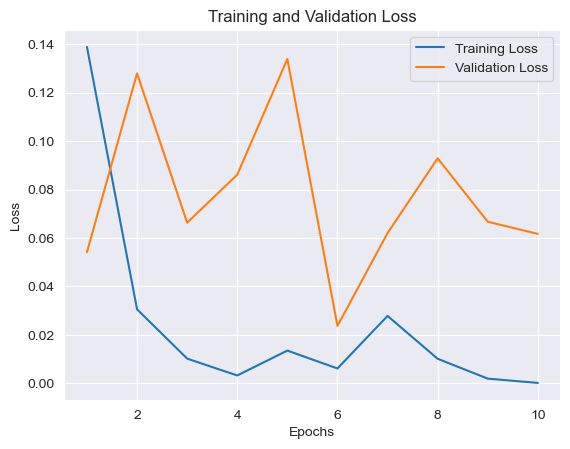

In [17]:
# Extract the training and validation loss values from the history object
train_loss = hist.history['loss']
val_loss = hist.history['val_loss']

# Create a list of epoch numbers (1 to number of epochs)
epochs = range(1, len(train_loss) + 1)

# Plot the loss graph
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

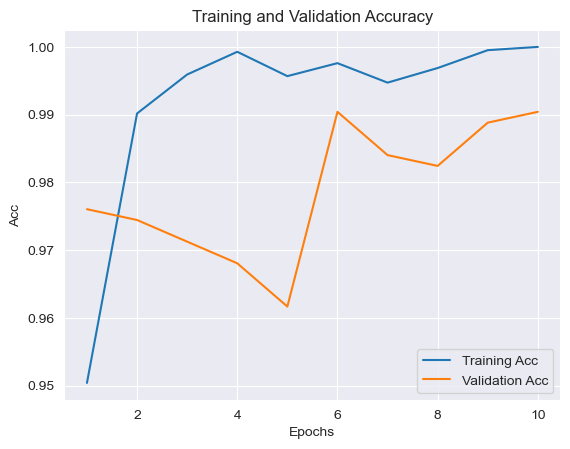

In [18]:
# Extract the training and validation loss values from the history object
train_accuracy = hist.history['accuracy']
val_accuracy = hist.history['val_accuracy']

# Create a list of epoch numbers (1 to number of epochs)
epochs = range(1, len(train_accuracy) + 1)

# Plot the loss graph
plt.plot(epochs, train_accuracy , label='Training Acc')
plt.plot(epochs, val_accuracy, label='Validation Acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.grid(True)
plt.show()


In [20]:
#evaluate model
ts_length = len(test_df)
test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
test_steps = ts_length // test_batch_size

train_score = model.evaluate(train_gen, steps= test_steps, verbose= 1)
val_score = model.evaluate(val_gen, steps= test_steps, verbose= 1)
test_score = model.evaluate(test_gen, steps= test_steps, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", val_score[0])
print("Validation Accuracy: ", val_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

11/11 [==============================] - 99s 9s/step - loss: 0.0391 - accuracy: 0.9904
Train Loss:  3.380137786734849e-05
Train Accuracy:  1.0
--------------------
Validation Loss:  0.08305525034666061
Validation Accuracy:  0.9829545617103577
--------------------
Test Loss:  0.039136968553066254
Test Accuracy:  0.9904305934906006


In [21]:
preds = model.predict_generator(test_gen)
y_pred = np.argmax(preds, axis=1)

In [22]:
# Classification report
print("Classification Reoport Using Inception Restnet V2")
print(classification_report(test_gen.classes, y_pred, target_names= classes))

Classification Reoport Using Inception Restnet V2
              precision    recall  f1-score   support

      NORMAL       0.98      0.98      0.98        99
   PNEUMONIA       0.99      0.99      0.99       319

    accuracy                           0.99       418
   macro avg       0.99      0.99      0.99       418
weighted avg       0.99      0.99      0.99       418



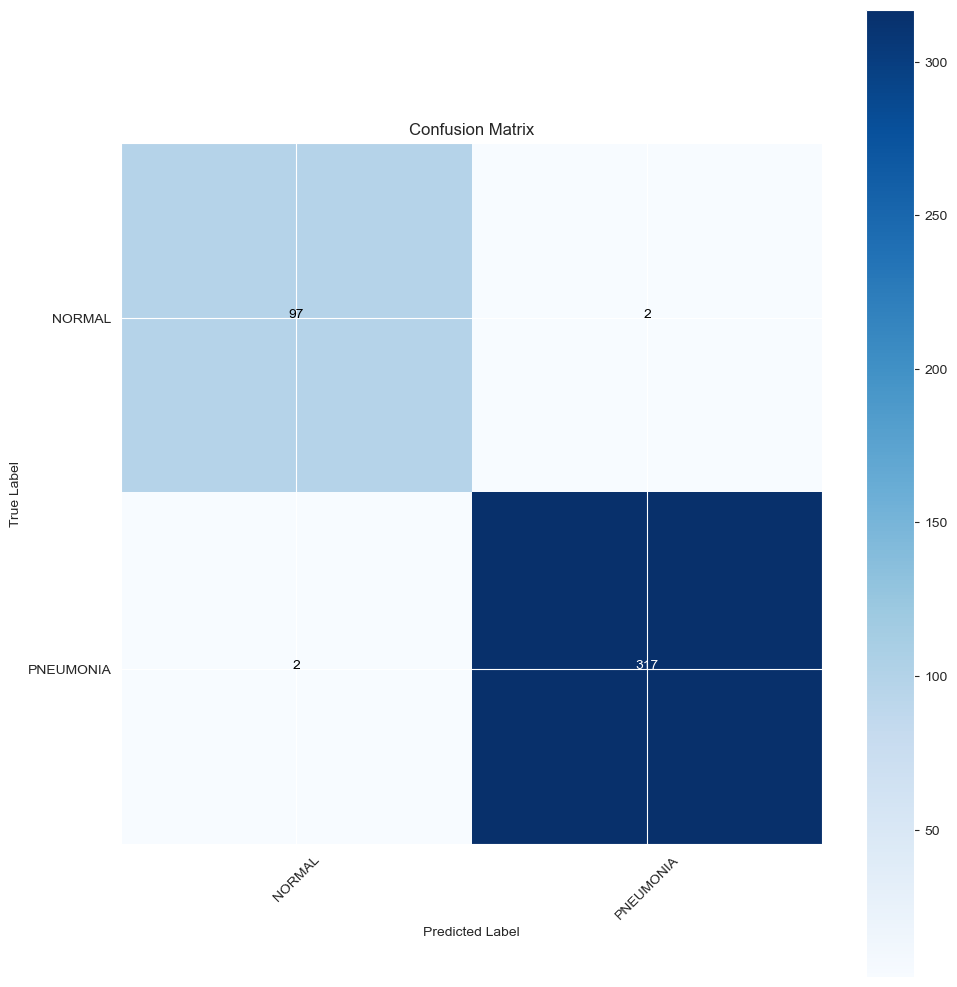

In [23]:
g_dict = test_gen.class_indices
classes = list(g_dict.keys())

# Confusion matrix
cm = confusion_matrix(test_gen.classes, y_pred)

plt.figure(figsize= (10, 10))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()

In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [32]:
#Accuracy
accuracy_irv2 = accuracy_score(test_gen.classes, y_pred)
f1_score_irv2 = f1_score(test_gen.classes, y_pred)
precision_score_irv2 = precision_score(test_gen.classes, y_pred)
print('Accuracy: %f' % (accuracy_irv2*100))
print('F1 Score: %f' % (f1_score_irv2*100))
print('Precision: %f' % (precision_score_irv2*100))

Accuracy: 99.043062
F1 Score: 99.373041
Precision: 99.373041


In [28]:
# Save the model
model.save('Inception_Resnet_model.h5')
print ("Model saved successfully!")

Model saved successfully!


In [103]:
#Early Stopping and Longer Epoch

In [104]:
def define_model(width, height):
    model_input = tf.keras.layers.Input(shape=(width, height, 3), name='image_input')
    model_main = tf.keras.applications.inception_resnet_v2.InceptionResNetV2(include_top=False, weights='imagenet')(model_input)
    model_dense1 = tf.keras.layers.Flatten()(model_main)
    model_dense2 = tf.keras.layers.Dense(128, activation='relu')(model_dense1)
    model_out = tf.keras.layers.Dense(2, activation="sigmoid")(model_dense2)

    model = tf.keras.models.Model(model_input,  model_out)
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.00004, beta_1=0.9, beta_2=0.999)
    model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    return model

In [109]:
nb_epoch     = 20
batch_size   = 16
width        = 299
height       = 299

In [110]:
model = define_model(width, height)
model.summary()
save_callback = define_callbacks()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 image_input (InputLayer)    [(None, 299, 299, 3)]     0         
                                                                 
 inception_resnet_v2 (Functi  (None, None, None, 1536)  54336736 
 onal)                                                           
                                                                 
 flatten_9 (Flatten)         (None, 98304)             0         
                                                                 
 dense_14 (Dense)            (None, 128)               12583040  
                                                                 
 dense_15 (Dense)            (None, 2)                 258       
                                                                 
Total params: 66,920,034
Trainable params: 66,859,490
Non-trainable params: 60,544
__________________________________________

In [111]:
hist = model.fit(x= train_gen, epochs= nb_epoch, verbose= 1, validation_data= val_gen, 
                    validation_steps= None, shuffle= False, batch_size=16, callbacks=[custom_early_stopping])
print(hist.history)
best_score = max(hist.history['val_accuracy'])
print(f"Best Validation score is: {best_score}")



Epoch 1/20
261/261 [==============================] - 64s 219ms/step - loss: 0.1544 - accuracy: 0.9418 - val_loss: 0.1935 - val_accuracy: 0.9569
Epoch 2/20
261/261 [==============================] - 51s 195ms/step - loss: 0.0378 - accuracy: 0.9859 - val_loss: 0.1646 - val_accuracy: 0.9776
Epoch 3/20
261/261 [==============================] - 51s 195ms/step - loss: 0.0115 - accuracy: 0.9954 - val_loss: 0.1345 - val_accuracy: 0.9760
Epoch 4/20
261/261 [==============================] - 51s 196ms/step - loss: 0.0327 - accuracy: 0.9895 - val_loss: 0.8035 - val_accuracy: 0.9744
Epoch 5/20
261/261 [==============================] - 51s 195ms/step - loss: 0.0140 - accuracy: 0.9945 - val_loss: 0.1238 - val_accuracy: 0.9760
Epoch 6/20
261/261 [==============================] - 51s 196ms/step - loss: 0.0052 - accuracy: 0.9978 - val_loss: 0.1492 - val_accuracy: 0.9792
Epoch 7/20
261/261 [==============================] - 51s 197ms/step - loss: 0.0010 - accuracy: 0.9995 - val_loss: 0.1428 - val_ac

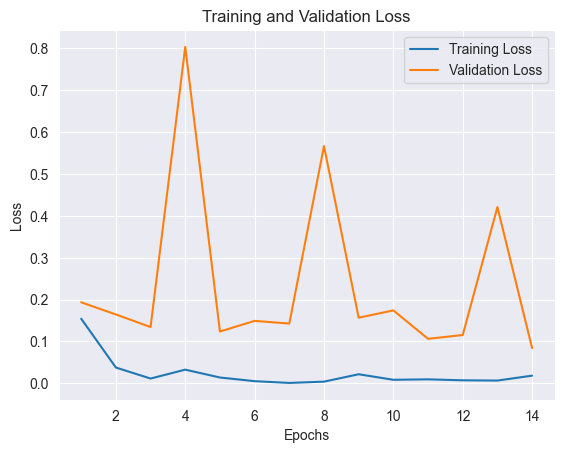

In [112]:
# Extract the training and validation loss values from the history object
train_loss = hist.history['loss']
val_loss = hist.history['val_loss']

# Create a list of epoch numbers (1 to number of epochs)
epochs = range(1, len(train_loss) + 1)

# Plot the loss graph
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

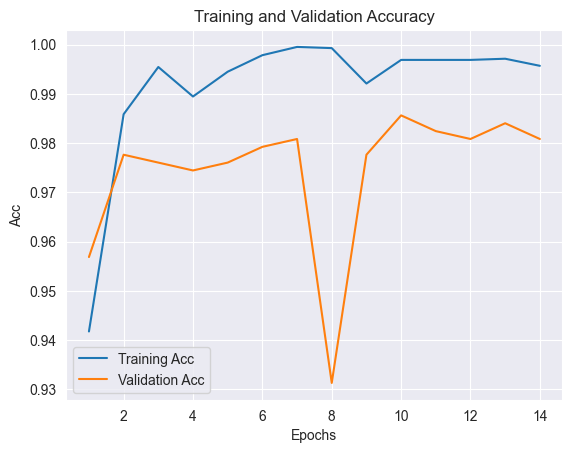

In [113]:
# Extract the training and validation loss values from the history object
train_accuracy = hist.history['accuracy']
val_accuracy = hist.history['val_accuracy']

# Create a list of epoch numbers (1 to number of epochs)
epochs = range(1, len(train_accuracy) + 1)

# Plot the loss graph
plt.plot(epochs, train_accuracy , label='Training Acc')
plt.plot(epochs, val_accuracy, label='Validation Acc')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.grid(True)
plt.show()


In [114]:
#evaluate model
ts_length = len(test_df)
test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
test_steps = ts_length // test_batch_size

train_score = model.evaluate(train_gen, steps= test_steps, verbose= 1)
val_score = model.evaluate(val_gen, steps= test_steps, verbose= 1)
test_score = model.evaluate(test_gen, steps= test_steps, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", val_score[0])
print("Validation Accuracy: ", val_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

11/11 [==============================] - 4s 378ms/step - loss: 0.0221 - accuracy: 0.9952
Train Loss:  0.0002558076521381736
Train Accuracy:  1.0
--------------------
Validation Loss:  0.16685590147972107
Validation Accuracy:  0.9829545617103577
--------------------
Test Loss:  0.02206355892121792
Test Accuracy:  0.9952152967453003


In [116]:
preds = model.predict_generator(test_gen)
y_pred = np.argmax(preds, axis=1)

In [117]:
preds = model.predict_generator(test_gen)
y_pred = np.argmax(preds, axis=1)

In [118]:
# Classification report
print("Classification Reoport Using Inception Restnet V2")
print(classification_report(test_gen.classes, y_pred, target_names= classes))

Classification Reoport Using Inception Restnet V2
              precision    recall  f1-score   support

      NORMAL       0.99      0.99      0.99        99
   PNEUMONIA       1.00      1.00      1.00       319

    accuracy                           1.00       418
   macro avg       0.99      0.99      0.99       418
weighted avg       1.00      1.00      1.00       418



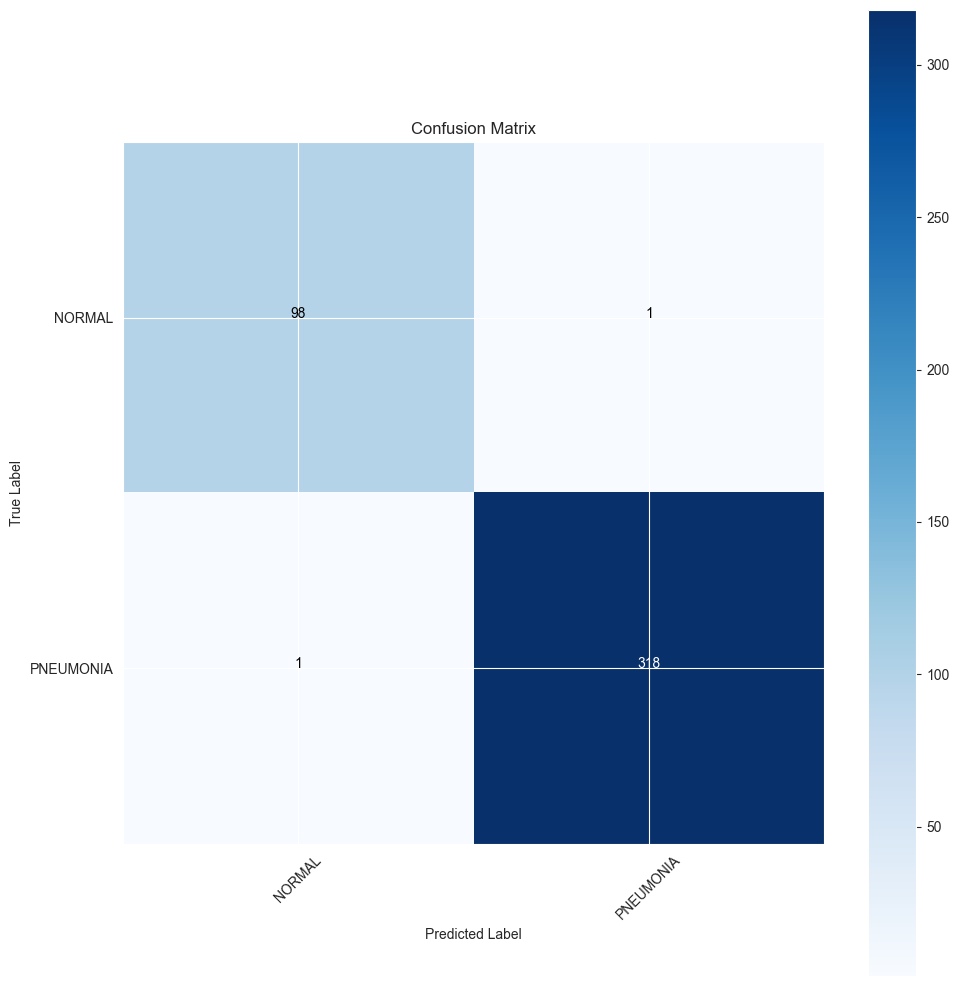

In [119]:
g_dict = test_gen.class_indices
classes = list(g_dict.keys())

# Confusion matrix
cm = confusion_matrix(test_gen.classes, y_pred)

plt.figure(figsize= (10, 10))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()

In [120]:
# Save the model
model.save('Inception_Resnet_early_stop.h5')
print ("Model saved successfully!")

Model saved successfully!


### References

1) https://www.kaggle.com/code/pkdarabi/diagnosis-of-pneumonia-by-cnn-classifier
2) https://www.kaggle.com/code/hadeerismail/pneumonia-detection-efficientnetb0-acc-99
3) https://www.kaggle.com/code/larsmadsen/tf-keras-inception-resnet-v2-97-acc
4) https://github.com/kentsommer/keras-inceptionV4/blob/master/inception_v4.py